In [1]:
import numpy as np 
from matplotlib import pyplot as plt 
from PIL import Image
import seaborn as sns 
plt.rc('font',family='Times New Roman') 
plt.rc('font',size=18) 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from pylab import semilogy
from sklearn.metrics import mean_squared_error
import math
from pylab import *
import cv2

### udacity原始图片

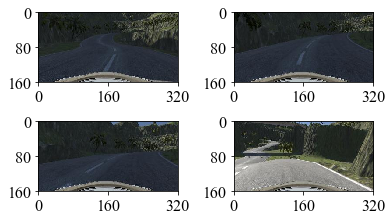

In [7]:
plt.rc('font',size=16) 
img_dir = "D:/dataset/selfdriving-car-simulator_Uisee1_3/img/"
img_name = ["120.jpg","140.jpg","2000.jpg","7000.jpg"]
# img_dir = "co_poly/"
# img_name = ["230.jpg","900.jpg","1375.jpg","1800.jpg"]
imgs = [Image.open(img_dir+i) for i in img_name]
plt.subplots_adjust(wspace =0.4, hspace =0)
plt.subplot(221)
plt.xlim([0,320])
plt.xticks(range(0,321,160))
plt.ylim([160,0])
plt.yticks(range(0,161,80))
plt.imshow(imgs[0])
plt.subplot(222)
plt.xlim([0,320])
plt.xticks(range(0,321,160))
plt.ylim([160,0])
plt.yticks(range(0,161,80))
plt.imshow(imgs[1])
plt.subplot(223)
plt.xlim([0,320])
plt.xticks(range(0,321,160))
plt.ylim([160,0])
plt.yticks(range(0,161,80))
plt.imshow(imgs[2])
plt.subplot(224)
plt.xlim([0,320])
plt.xticks(range(0,321,160))
plt.ylim([160,0])
plt.yticks(range(0,161,80))
plt.imshow(imgs[3])
plt.savefig("udacity_4_original.jpg",dpi=500,bbox_inches = 'tight')
plt.show()

### comma原始图片

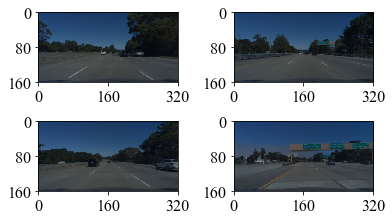

In [15]:
img_dir = "D:/dataset/comma_c12_uisee_100_102_104_105_115_118_m/img/"
img_name = ["1.jpg","148.jpg","513.jpg","4180.jpg"]
imgs = [cv2.resize(np.array(Image.open(img_dir+i))[0:240,:,:],(320,160)) for i in img_name]
plt.subplots_adjust(wspace =0.4, hspace =0)
plt.subplot(221)
plt.xlim([0,320])
plt.xticks(range(0,321,160))
plt.ylim([160,0])
plt.yticks(range(0,161,80))
plt.imshow(imgs[0])
plt.subplot(222)
plt.xlim([0,320])
plt.xticks(range(0,321,160))
plt.ylim([160,0])
plt.yticks(range(0,161,80))
plt.imshow(imgs[1])
plt.subplot(223)
plt.xlim([0,320])
plt.xticks(range(0,321,160))
plt.ylim([160,0])
plt.yticks(range(0,161,80))
plt.imshow(imgs[2])
plt.subplot(224)
plt.xlim([0,320])
plt.xticks(range(0,321,160))
plt.ylim([160,0])
plt.yticks(range(0,161,80))
plt.imshow(imgs[3])
plt.show()
plt.savefig("comma_4_original.jpg",dpi=500,bbox_inches = 'tight')

###  udacity绘制去均值归一化后图片

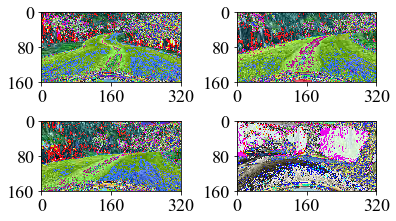

In [34]:
def prewhiten(x):
    if x.ndim == 4:
        axis = (1, 2, 3)
        size = x[0].size
    elif x.ndim == 3:
        axis = (0, 1, 2)
        size = x.size
    else:
        raise ValueError('Dimension should be 3 or 4')

    mean = np.mean(x, axis=axis, keepdims=True)
    std = np.std(x, axis=axis, keepdims=True)
    std_adj = np.maximum(std, 1.0/np.sqrt(size))
    y = (x - mean) / std_adj

#     ma = np.max(y)
    mi = np.min(y)
    y = (y+mi)+100
    return y
img_dir = "D:/dataset/selfdriving-car-simulator_Uisee1_3/img/"
img_name = ["120.jpg","140.jpg","2000.jpg","7000.jpg"]
imgs = [prewhiten(np.array(Image.open(img_dir+i)))  for i in img_name]
plt.figure()
plt.subplots_adjust(wspace =0.4, hspace =0)
plt.subplot(221)
plt.xlim([0,320])
plt.xticks(range(0,321,160))
plt.ylim([160,0])
plt.yticks(range(0,161,80))
plt.imshow(imgs[0])
plt.subplot(222)
plt.xlim([0,320])
plt.xticks(range(0,321,160))
plt.ylim([160,0])
plt.yticks(range(0,161,80))
plt.imshow(imgs[1])
plt.subplot(223)
plt.xlim([0,320])
plt.xticks(range(0,321,160))
plt.ylim([160,0])
plt.yticks(range(0,161,80))
plt.imshow(imgs[2])
plt.subplot(224)
plt.xlim([0,320])
plt.xticks(range(0,321,160))
plt.ylim([160,0])
plt.yticks(range(0,161,80))
plt.imshow(imgs[3])
plt.savefig("udacity_4_prewhiten.jpg",dpi=500,bbox_inches = 'tight')
plt.show()

In [30]:
np.min(imgs[0])

-1.673450953465761

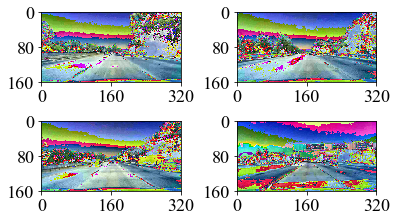

In [40]:
def prewhiten(x):
    if x.ndim == 4:
        axis = (1, 2, 3)
        size = x[0].size
    elif x.ndim == 3:
        axis = (0, 1, 2)
        size = x.size
    else:
        raise ValueError('Dimension should be 3 or 4')

    mean = np.mean(x, axis=axis, keepdims=True)
    std = np.std(x, axis=axis, keepdims=True)
    std_adj = np.maximum(std, 1.0/np.sqrt(size))
    y = (x - mean) / std_adj
    return y

img_dir = "D:/dataset/comma_c12_uisee_100_102_104_105_115_118_m/img/"
img_name = ["1.jpg","148.jpg","513.jpg","4180.jpg"]
imgs = [cv2.resize(prewhiten(np.array(Image.open(img_dir+i)))[0:240,:,:],(320,160))  for i in img_name]
plt.subplots_adjust(wspace =0.4, hspace =0)
plt.subplot(221)
plt.xlim([0,320])
plt.xticks(range(0,321,160))
plt.ylim([160,0])
plt.yticks(range(0,161,80))
plt.imshow(imgs[0])
plt.subplot(222)
plt.xlim([0,320])
plt.xticks(range(0,321,160))
plt.ylim([160,0])
plt.yticks(range(0,161,80))
plt.imshow(imgs[1])
plt.subplot(223)
plt.xlim([0,320])
plt.xticks(range(0,321,160))
plt.ylim([160,0])
plt.yticks(range(0,161,80))
plt.imshow(imgs[2])
plt.subplot(224)
plt.xlim([0,320])
plt.xticks(range(0,321,160))
plt.ylim([160,0])
plt.yticks(range(0,161,80))
plt.imshow(imgs[3])

plt.savefig("comma_4_prewhiten.jpg",dpi=500,bbox_inches = 'tight')
plt.show()

In [ ]:
imgs

### udacity速度转角曲线

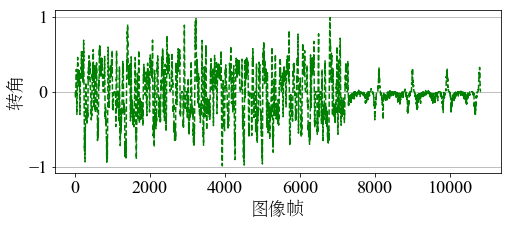

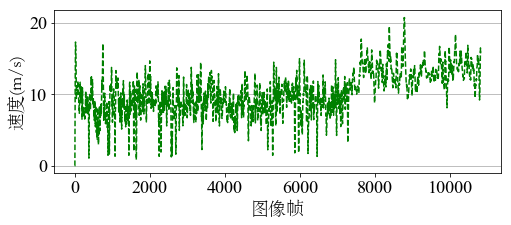

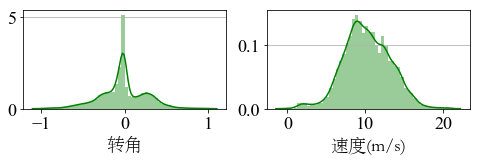

In [29]:
font1 = {'family' : 'Times New Roman',
'weight' : 'black',
'size'   : 14}
font2 = {'family' : 'STSong',
'weight' : 'light',
'size'   : 18}
img_dir = ""
label_name = "action_pose.txt"
def angle_filter(angle,filter_size = 11):
    filter = np.ones((1,filter_size),dtype=np.float)/filter_size
    for i in range(filter_size//2,angle.shape[0]-filter_size//2):
        mul = np.matmul(filter,angle[i-filter_size//2:i+filter_size//2+1,:])
        angle[i,:] = mul
    return np.squeeze(angle,axis=1)
f_label = open(img_dir+label_name,'r')
f_label_lines = f_label.readlines()
label = np.zeros((len(f_label_lines),2))
for i,j in enumerate(f_label_lines):
    label[i][0] = float(j.split(",")[-2])
    label[i][1] = float(j.split(",")[-1])
f_label.close()
label[:,0] = angle_filter(np.reshape(label[:,0],[-1,1]))
label[:,1] = angle_filter(np.reshape(label[:,1],[-1,1]))
spilt_index = 7300
plt.figure(figsize=(8,3))
plt.xlabel("图像帧",font2)
plt.ylabel("转角",font2)
plt.grid(axis="y")
plt.plot(range(len(label[:,0])),label[:,0],color='green', linestyle='--',label="Angle")
# plt.legend()
plt.savefig("steer.jpg",dpi=500,bbox_inches = 'tight')

plt.figure(figsize=(8,3))
plt.xlabel("图像帧",font2)
plt.ylabel("速度(m/s)",font2)
plt.grid(axis="y")

plt.plot(range(len(label[:,1])),label[:,1],color='green', linestyle='--',label="Speed")
# plt.legend()
plt.savefig("speed.jpg",dpi=500,bbox_inches = 'tight')

plt.figure(figsize=(8,4))
plt.subplot(221)
plt.grid(axis="y")
plt.xlabel("转角",font2)
sns.distplot(label[:,0],color="green")

plt.subplot(222)
plt.xticks()
plt.yticks()
plt.grid(axis="y")
plt.xlabel("速度(m/s)",font2)
sns.distplot(label[:,1],color="green")
plt.savefig("dist.jpg",dpi=500,bbox_inches = 'tight')
plt.show()

### comma 速度转角曲线 （39782/9581）

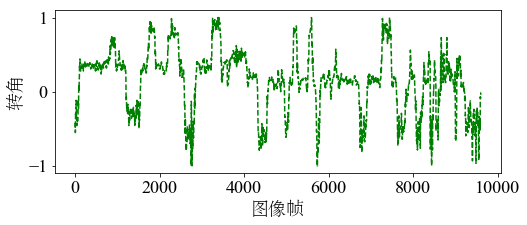

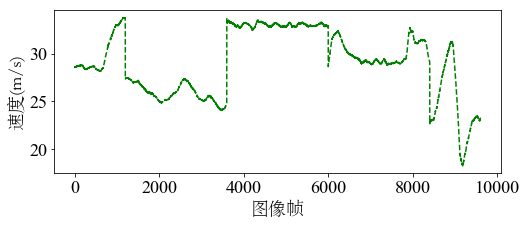

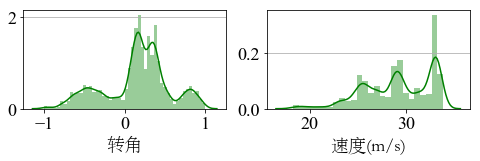

In [43]:
# img_dir = "E:/dateset/comma_c12_uisee_100_102_104_105_115_118_m/"
img_dir = "D:/dataset/comma_c12_uisee_100_102_104_105_115_118_m/"
label_name = "comma_label_ds.txt"  #comma_label_ds
# slice_list = [int(i*14919/9600) for i in range(9600)]
slice_list = [int(i*9946/2400) for i in range(2400)]
f_label = open(img_dir+label_name,'r')
f_label_lines = f_label.readlines()
label = np.zeros((len(f_label_lines),2))
for i,j in enumerate(f_label_lines):
    label[i][0] = float(j.split(",")[-2])
    label[i][1] = float(j.split(",")[-1])
f_label.close()
# label[:,0] = angle_filter(np.reshape(label[:,0],[-1,1]))
# label[:,1] = angle_filter(np.reshape(label[:,1],[-1,1]))
scaler = StandardScaler((-1,1)).fit(label[:,:1])
label_scaler = scaler.transform(label[:,:1])
# label[:,0] = label_scaler[:,0]
# label[:,0] = label[:,0]/np.max(label[:,0])
# label = label[slice_list]

spilt_index = 2400
plt.figure(figsize=(8,3))
plt.xlabel("图像帧",font2)
plt.ylabel("转角",font2)
plt.plot(range(len(label[:,0])),label[:,0],color='green',linestyle='--',label="Steer")
plt.savefig("steer.jpg",dpi=500,bbox_inches = 'tight')

plt.figure(figsize=(8,3))
plt.xlabel("t")
plt.xlabel("图像帧",font2)
plt.ylabel("速度(m/s)",font2)
plt.plot(range(len(label[:,1])),label[:,1],color='green', linestyle='--',label="Speed")
plt.savefig("speed.jpg",dpi=500,bbox_inches = 'tight')

plt.figure(figsize=(8,4))
plt.subplot(221)
plt.grid(axis="y")
plt.xlabel("转角",font2)
sns.distplot(label[:,0],color="green")

plt.subplot(222)
plt.xticks()
plt.yticks()
plt.grid(axis="y")
plt.xlabel("速度(m/s)",font2)
sns.distplot(label[:,1],color="green")
plt.savefig("dist.jpg",dpi=500,bbox_inches = 'tight')
plt.show()

### calar 速度转角曲线 （39782/9581）

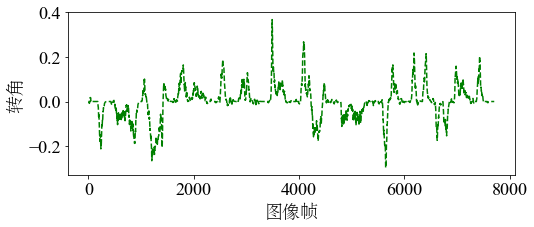

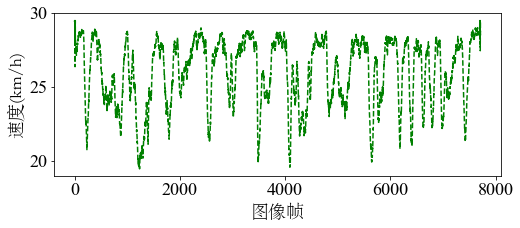

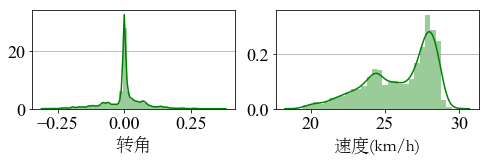

In [31]:
font1 = {'family' : 'Times New Roman',
'weight' : 'black',
'size'   : 14}
font2 = {'family' : 'STSong',
'weight' : 'light',
'size'   : 18}
def angle_filter(angle,filter_size = 29):
    filter = np.ones((1,filter_size),dtype=np.float)/filter_size
    for i in range(filter_size//2,angle.shape[0]-filter_size//2):
        mul = np.matmul(filter,angle[i-filter_size//2:i+filter_size//2+1,:])
        angle[i,:] = mul
    return np.squeeze(angle,axis=1)
# img_dir = "E:/dateset/comma_c12_uisee_100_102_104_105_115_118_m/"
img_dir = "D:/dataset/carla527_test1_train_1_3_m/"
label_name = "action_pose_carla_speed.txt"  #comma_label_ds
# slice_list = [int(i*14919/9600) for i in range(9600)]
slice_list = [int(i*9946/2400) for i in range(2400)]
f_label = open(img_dir+label_name,'r')
f_label_lines = f_label.readlines()
label = np.zeros((len(f_label_lines),2))
for i,j in enumerate(f_label_lines):
    label[i][0] = float(j.split(",")[-2])
    label[i][1] = float(j.split(",")[-1])
f_label.close()
if True:
    label[:,0] = angle_filter(np.reshape(label[:,0],[-1,1]),filter_size=29)
    label[:,1] = angle_filter(np.reshape(label[:,1],[-1,1]),filter_size=29)
# label[:,0] = angle_filter(np.reshape(label[:,0],[-1,1]))
# label[:,1] = angle_filter(np.reshape(label[:,1],[-1,1]))
# scaler = StandardScaler((-1,1)).fit(label[:,:1])
# label_scaler = scaler.transform(label[:,:1])
# label[:,0] = label_scaler[:,0]
# label[:,0] = label[:,0]/np.max(label[:,0])
# label = label[slice_list]

spilt_index = 2400
plt.figure(figsize=(8,3))
plt.xlabel("图像帧",font2)
plt.ylabel("转角",font2)
plt.plot(range(len(label[:,0])),label[:,0],color='green',linestyle='--',label="Steer")
plt.savefig("steer.jpg",dpi=500,bbox_inches = 'tight')

plt.figure(figsize=(8,3))
plt.xlabel("t")
# plt.ylim([25,32])
plt.xlabel("图像帧",font2)
plt.ylabel("速度(km/h)",font2)
plt.plot(range(len(label[:,1])),label[:,1],color='green', linestyle='--',label="Speed")
plt.savefig("speed.jpg",dpi=500,bbox_inches = 'tight')

plt.figure(figsize=(8,4))
plt.subplot(221)
plt.grid(axis="y")
plt.xlabel("转角",font2)
sns.distplot(label[:,0],color="green")

plt.subplot(222)
plt.xticks()
plt.yticks()
plt.grid(axis="y")
plt.xlabel("速度(km/h)",font2)
sns.distplot(label[:,1],color="green")
plt.savefig("dist.jpg",dpi=500,bbox_inches = 'tight')
plt.show()

In [22]:
f_ds_label = open("D:/dataset/comma_c12_uisee_104_105/comma_label_ds.txt","w")
for i in range(len(label)):
    f_ds_label.write(str(label[i,0])+","+str(label[i,1])+"\n")
f_ds_label.close()

In [53]:
##calar 速度转角曲线 
img_dir = ""
label_name = "action_pose_calar.txt"
def angle_filter(angle,filter_size = 21):
    filter = np.ones((1,filter_size),dtype=np.float)/filter_size
    for i in range(filter_size//2,angle.shape[0]-filter_size//2):
        mul = np.matmul(filter,angle[i-filter_size//2:i+filter_size//2+1,:])
        angle[i,:] = mul
    return np.squeeze(angle,axis=1)
f_label = open(img_dir+label_name,'r')
f_label_lines = f_label.readlines()
label = np.zeros((len(f_label_lines),2))
for i,j in enumerate(f_label_lines):
    label[i][0] = float(j.split(",")[-1])
    label[i][1] = float(j.split(",")[-2])
f_label.close()
label[:,0] = angle_filter(np.reshape(label[:,0],[-1,1]))
label[:,1] = angle_filter(np.reshape(label[:,1],[-1,1]))
spilt_index = 7300
plt.figure(figsize=(8,3))
plt.xlabel("t")
plt.ylabel("Steering")
plt.grid(axis="y")
plt.plot(range(len(label[:,0])),label[:,0],color='green', linestyle='--',label="Angle")
# plt.legend()
plt.savefig("steer.jpg",dpi=500,bbox_inches = 'tight')

plt.figure(figsize=(8,3))
plt.xlabel("t")
plt.ylabel("Speed(m/s)")
plt.grid(axis="y")

plt.plot(range(len(label[:,1])),label[:,1],color='green', linestyle='--',label="Speed")
# plt.legend()
plt.savefig("speed.jpg",dpi=500,bbox_inches = 'tight')

plt.figure(figsize=(8,4))
plt.subplot(221)
plt.grid(axis="y")
plt.xlabel("Steering")
sns.distplot(label[:,0],color="green")

plt.subplot(222)
plt.xticks()
plt.yticks()
plt.grid(axis="y")
plt.xlabel("Speed(m/s)")
sns.distplot(label[:,1],color="green")
plt.show()
# plt.savefig("dist.jpg",dpi=500,bbox_inches = 'tight')

FileNotFoundError: [Errno 2] No such file or directory: 'action_pose_calar.txt'

### 绘制loss

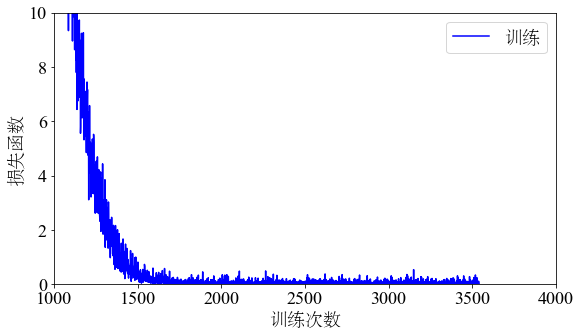

In [8]:
log_dir = "log/"
no_test = False
font1 = {'family' : 'Times New Roman',
'weight' : 'black',
'size'   : 14}
font2 = {'family' : 'STSong',
'weight' : 'light',
'size'   : 18}
train_loss_name = "train_loss.log"
if no_test:
    test_loss_name = "train_loss.log"
else:
    test_loss_name = "test_loss.log"
specific_dir = True
if specific_dir:
#     log_sub_dir = ["4_25_30ep_comma_vgg_kivi_3c_kivinet_2pred_test_half"]
    log_sub_dir = ["5_19ep_udacity_3c_vgg_kivi_2pred_test_half"]

else:
    log_sub_dir = os.listdir(log_dir)
#%%
def cal_batchs(lines_list):
    count = 0 
    for line in lines_list:
        if line[:7] == "epoch:1":
            count+=1
        else:
            break
    return count
def init__plot(fig_title,xlabel,ylabel):
    # plt.grid(axis = "y")
    plt.title(fig_title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # plt.yticks(range(0,100,10))
def get_data_list(f_name):
    f = open(f_name,'r')
    f_lines = f.readlines()
    f_batch_num = cal_batchs(f_lines)
    loss__batchs = []
    loss__epochs = []
    for l in f_lines:
        loss__batchs.append(float(l.split()[-1].strip("/n")))
    for i in range(len(f_lines)//f_batch_num):
        loss__epochs.append(\
            sum(loss__batchs[i*f_batch_num:(i+1)*f_batch_num])/f_batch_num)
    return [loss__batchs,loss__epochs]
for log in log_sub_dir:
    if log[-4:] == ".jpg":
        continue
    loss_train_batchs,loss_train_epochs = get_data_list(log_dir+log+"/"+train_loss_name)
    loss_test_batchs,loss_test_epochs = get_data_list(log_dir+log+"/"+test_loss_name)
# # plt.figure(figsize=(20,5))
loss_train_batchs_half = []
# if "udacity" in log_sub_dir[0]:
#     for i,j in enumerate(loss_train_batchs[:-1]):
#         if i%2 == 0:
#             loss_train_batchs_half.append((loss_train_batchs[i]+loss_train_batchs[i+1])/2)
# else:
#     loss_train_batchs_half = loss_train_batchs
plt.figure(figsize=(9,5))
plt.ylim([0,40])
# plt.xlim([500,4000])
# plt.xticks([0,600,1350])
plt.xlabel("训练次数",font2)
plt.ylabel("损失函数",font2)
# plt.grid(axis="y")
plt.plot(range(len(loss_train_batchs)),loss_train_batchs,color='b',label="训练")
plt.plot(list(range(135,4051,135)),loss_test_epochs,color='green',label="测试")
plt.legend(loc=1,prop=font2)
plt.savefig("uc1.jpg",dpi=500,bbox_inches = 'tight')
plt.show()



### 绘制subplot loss

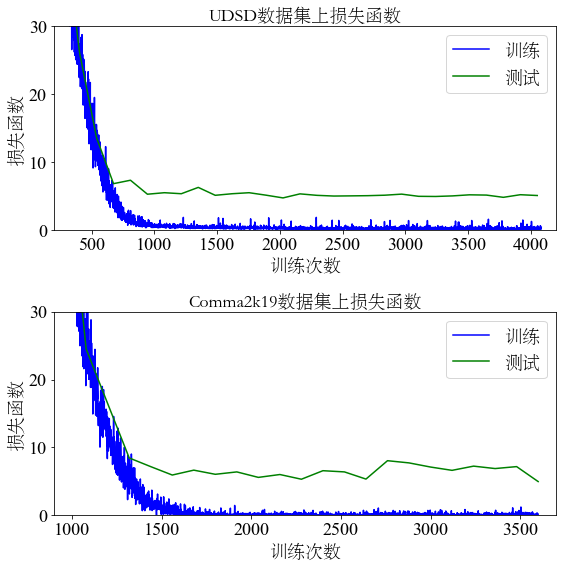

In [30]:
log_dir = "log/"
no_test = False
font1 = {'family' : 'Times New Roman',
'weight' : 'black',
'size'   : 14}
font2 = {'family' : 'STSong',
'weight' : 'light',
'size'   : 18}
train_loss_name = "train_loss.log"
if no_test:
    test_loss_name = "train_loss.log"
else:
    test_loss_name = "test_loss.log"
specific_dir = True
if specific_dir:
#     log_sub_dir = ["4_25_30ep_comma_vgg_kivi_3c_kivinet_2pred_test_half"]
    log_sub_dir = ["5_19udacity_nvNet_2pred_test_half","5_19ep_comma_nvNet_2pred_test_half"]

else:
    log_sub_dir = os.listdir(log_dir)
#%%
def cal_batchs(lines_list):
    count = 0 
    for line in lines_list:
        if line[:7] == "epoch:1":
            count+=1
        else:
            break
    return count
def init__plot(fig_title,xlabel,ylabel):
    # plt.grid(axis = "y")
    plt.title(fig_title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # plt.yticks(range(0,100,10))
def get_data_list(f_name):
    f = open(f_name,'r')
    f_lines = f.readlines()
    f_batch_num = cal_batchs(f_lines)
    loss__batchs = []
    loss__epochs = []
    for l in f_lines:
        loss__batchs.append(float(l.split()[-1].strip("/n")))
    for i in range(len(f_lines)//f_batch_num):
        loss__epochs.append(\
            sum(loss__batchs[i*f_batch_num:(i+1)*f_batch_num])/f_batch_num)
    return [loss__batchs,loss__epochs]
plt.figure(figsize=(9,9))


loss_train_batchs1,loss_train_epochs1 = get_data_list(log_dir+log_sub_dir[0]+"/"+train_loss_name)
loss_test_batchs1,loss_test_epoch1 = get_data_list(log_dir+log_sub_dir[0]+"/"+test_loss_name)
loss_train_batchs2,loss_train_epochs2 = get_data_list(log_dir+log_sub_dir[1]+"/"+train_loss_name)
loss_test_batchs2,loss_test_epoch2 = get_data_list(log_dir+log_sub_dir[1]+"/"+test_loss_name)

plt.subplots_adjust(wspace =0.4, hspace =0.4)
plt.subplot(211)
plt.title("UDSD数据集上损失函数",font2)
plt.ylim([0,30])
# plt.xlim([100,4200])
plt.xlim([200,4200])
# plt.xticks([0,600,1350])
plt.xlabel("训练次数",font2)
plt.ylabel("损失函数",font2)
# plt.grid(axis="y")
plt.plot(range(len(loss_train_batchs1)),loss_train_batchs1,color='b',label="训练")
plt.plot(list(range(135,4051,135)),loss_test_epoch1,color='green',label="测试")
plt.legend(loc=1,prop=font2)
# plt.savefig("uc1.jpg",dpi=500,bbox_inches = 'tight')

plt.subplot(212)
plt.title("Comma2k19数据集上损失函数",font2)
plt.ylim([0,30])
# plt.xlim([600,3700])
plt.xlim([900,3700])
# plt.xticks([1000,3600,300])
plt.xlabel("训练次数",font2)
plt.ylabel("损失函数",font2)
# plt.grid(axis="y")
plt.plot(range(len(loss_train_batchs2)),loss_train_batchs2,color='b',label="训练")
plt.plot(list(range(120,3601,120)),loss_test_epoch2,color='green',label="测试")
plt.legend(loc=1,prop=font2)
plt.savefig("uc1.jpg",dpi=500,bbox_inches = 'tight')
plt.show()



In [25]:
a = "fdgjk"
b = "dgk" in a


### conv1卷积可视化

Using TensorFlow backend.


C:\Users\xps\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=Tensor("ac...)`


(76, 156, 32)


C:\Users\xps\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


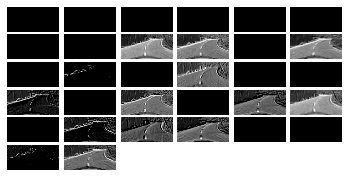

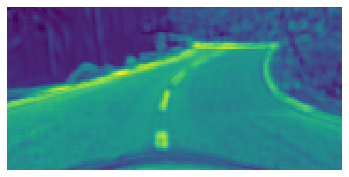

In [3]:
#%%
from keras.models import Model
import cv2
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D,Deconv2D
from keras.layers import Activation
from pylab import *
import keras
from keras.models import load_model
from keras.applications import VGG16
def normlization(batch):
    if np.ndim(batch)!=4:
        print("ndims is not 4!")
    else:
        num_max = np.max(batch)
        num_min = np.min(batch)
        batch = (batch-num_min)/(num_max-num_min)
    return batch
def get_row_col(num_pic):
    squr = num_pic ** 0.5
    row = round(squr)
    col = row + 1 if squr - row > 0 else row
    return row, col
def visualize_feature_map(img_batch,fig_name):
    feature_map = np.squeeze(img_batch, axis=0)
    print(feature_map.shape)
    feature_map_combination = []
    num_pic = feature_map.shape[2]
    row, col = get_row_col(num_pic)
    plt.figure(fig_name,figsize=(6,3))
    plt.subplots_adjust(wspace =0.1, hspace =0.1)
    for i in range(0, num_pic):
        feature_map_split = feature_map[:, :, i]
        feature_map_split_grey = 0-feature_map_split.copy()
        if i in list(range(8))+[10,12,14,16,17,19,21,24,28,29]:
            feature_map_split_grey[0,0]=-10
        feature_map_combination.append(feature_map_split)
        plt.subplot(row, col, i + 1)
        plt.imshow(feature_map_split_grey,cmap="Greys")
        axis('off')
    plt.savefig(fig_name+".png",dpi=500,bbox_inches = 'tight')
    plt.figure(fig_name+"_sum")
    feature_map_sum = sum(ele for ele in feature_map_combination)
    plt.imshow(feature_map_sum)
    axis('off')
    plt.savefig(fig_name+"_sum"+".png",dpi=500,bbox_inches = 'tight')
model_name = "log/4_24ep_udacity_3c_kivinet_2pred_test_half/KivlNet_part2_25_plus5.h5"
# model_name = "log/4_26_30ep_comma_3c_kivinet_2pred_test_half/KivlNet_part2_25.h5"
output_layer_name = ["activation_1","activation_2","activation_3","activation_4"]#'activation_1'
img_name = r'E:\dateset\selfdriving-car-simulator_Uisee1_3\img\556.jpg'    #533.jpg
# img_name = r'E:\dateset\comma_c12_uisee_100_102_104_105_115_118_m\img\6010.jpg'
model = load_model(model_name)
x1_or = model.get_layer(output_layer_name[0]).output
x1 = model.get_layer(output_layer_name[0]).output
model1 = Model(input=model.input, output=x1)
img = cv2.imread(img_name)
# img = img[80:220,:,:]
img = cv2.resize(img,(160,80))/255
# img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)/255
# img = np.expand_dims(img,axis=2)
img_batch = np.expand_dims(img, axis=0)
conv_img1 = model1.predict(img_batch)   #1*row*col*32
visualize_feature_map(conv_img1,"conv1")
# visualize_feature_map(conv_img2,"conv2")
plt.show()


### udacity绘制实验对比图

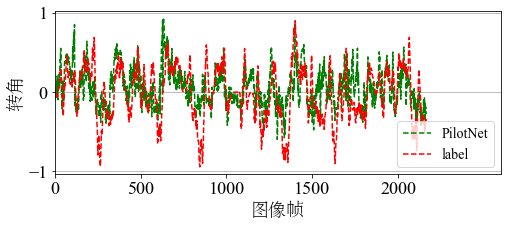

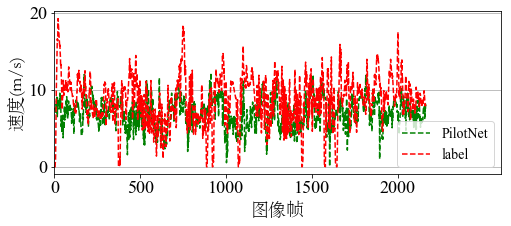

In [27]:
# plt.rc('font',family='Times New Roman') 
# plt.rc('font',size=18) 

font1 = {'family' : 'Times New Roman',
'weight' : 'black',
'size'   : 14}
font2 = {'family' : 'STSong',
'weight' : 'light',
'size'   : 18}
if_angle_filter = True
label_dir = "action_pose.txt"
# predict_dir1 = "prediction_comma_3channel_kivinet.log"
# predict_dir2 = "prediction_comma_vgg_kivi_3channel_kivinet.log"
# predict_dir3 = "prediction_comma_inception.log"
# predict_dir1 = "prediction_comma_vgg_transfer.log"
# predict_dir2 = "prediction_comma_inception.log"
# predict_dir3 = "prediction_comma_nvNet_5_7.log"
predict_dir0 = "prediction_udacity_vgg_transfer5_19.log"
predict_dir1 = "prediction_udacity_inception3_5_19.log"
predict_dir2 = "prediction_udacity_vgg_fla_3channel_kivinet_5_19.log"
predict_dir3 = "prediction_udacity_nvNet_5_19.log"
predict_dir4 = "prediction_udacity_seg_fla_3channel_kivinet_5_19.log"
def angle_filter(angle,filter_size = 11):
    filter = np.ones((1,filter_size),dtype=np.float)/filter_size
    for i in range(filter_size//2,angle.shape[0]-filter_size//2):
        mul = np.matmul(filter,angle[i-filter_size//2:i+filter_size//2+1,:])
        angle[i,:] = mul
    return np.squeeze(angle,axis=1)
def cal_RMSE(predict_np,label_np):
    label_np_cut = label_np[:predict_np.shape[0],:]
    RMSE_angle = math.sqrt(mean_squared_error(predict_np[:,0],label_np_cut[:,0]))
    RMSE_speed = math.sqrt(mean_squared_error(predict_np[:,1],label_np_cut[:,1]))
    return [RMSE_angle,RMSE_speed]
f_label = open(label_dir,'r')
f_label_lines = f_label.readlines()
label = np.zeros((len(f_label_lines),2))
for i,j in enumerate(f_label_lines):
    label[i][0] = float(j.split(",")[-2])
    label[i][1] = float(j.split(",")[-1])
f_label.close()
if if_angle_filter:
    label[:,0] = angle_filter(np.reshape(label[:,0],[-1,1]))
def get_predict_np(predict_dir):
    f_predict = open(predict_dir,'r')
    f_predict_lines = f_predict.readlines()
    angle_predict = []
    speed_predict = []
    train_data_index = []
    test_data_index = []
    count_train = 0
    count_test = 0
    for i in f_predict_lines:
        if i != "":
            angle_predict.append(float(i.split(",")[2]))
            speed_predict.append(float(i.split(",")[3]))
            if (i.split(",")[0]=='train'):
                train_data_index.append(int(i.split(",")[1][:-4]))
                count_train +=1
            else:
                test_data_index.append(int(i.split(",")[1][:-4]))
                count_test +=1
    predict_np = np.array([angle_predict,speed_predict]).T
    return [predict_np,count_train,count_test,test_data_index,angle_predict,speed_predict]
predict_np0,count_train0,count_test0,test_data_index0,angle_predict0,speed_predict0 = get_predict_np(predict_dir0)
predict_np1,count_train1,count_test1,test_data_index1,angle_predict1,speed_predict1 = get_predict_np(predict_dir1)
predict_np2,count_train2,count_test2,test_data_index2,angle_predict2,speed_predict2 = get_predict_np(predict_dir2)
predict_np3,count_train3,count_test3,test_data_index3,angle_predict3,speed_predict3 = get_predict_np(predict_dir3)
predict_np4,count_train4,count_test4,test_data_index4,angle_predict4,speed_predict4 = get_predict_np(predict_dir4)
# RMSE_angle_train,RMSE_speed_train = cal_RMSE(predict_np[:count_train],label[train_data_index])
RMSE_angle_test0,RMSE_speed_test0 = cal_RMSE(predict_np0[count_train0:],label[test_data_index0])
RMSE_angle_test1,RMSE_speed_test1 = cal_RMSE(predict_np1[count_train1:],label[test_data_index1])
RMSE_angle_test2,RMSE_speed_test2 = cal_RMSE(predict_np2[count_train1:],label[test_data_index2])
RMSE_angle_test3,RMSE_speed_test3 = cal_RMSE(predict_np3[count_train3:],label[test_data_index3])
RMSE_angle_test4,RMSE_speed_test4 = cal_RMSE(predict_np4[count_train4:],label[test_data_index4])
# print("Train angle RMSE:%s,Train speed RMSE:%s\n \
#     Test angle RMSE:%s,Test speed RMSE:%s"%(\
#         RMSE_angle_train,RMSE_speed_train,RMSE_angle_test,RMSE_speed_test))
#********  angle *********
#********  angle *********
plt.figure(figsize=(8,3))
plt.xlabel("图像帧",font2)
plt.ylabel("转角",font2)#Speed(m/s)
plt.grid(axis="y")
plt.xlim([0,2600])
plt.xticks(range(0,2001,500))

plt.plot(range(len(test_data_index3)),np.array(angle_predict3[count_train3:count_train3+count_test3]),label = "PilotNet", color='g', linestyle='--')
plt.plot(range(len(test_data_index1)),label[test_data_index1,0],label = "label", color='r', linestyle='--')
plt.legend(loc=4,prop=font1)
plt.savefig("co_a.png",dpi=500,bbox_inches = 'tight')
#********  speed *********
#********  speed *********
plt.figure(figsize=(8,3))
plt.xlabel("图像帧",font2)
plt.ylabel("速度(m/s)",font2)#Speed(m/s)
plt.grid(axis="y")
plt.xlim([0,2600])
# plt.ylim([20,40])
plt.xticks(range(0,2001,500))

plt.plot(range(len(test_data_index3)),np.array(speed_predict3[count_train3:count_train3+count_test3]),label = "PilotNet", color='g', linestyle='--')
plt.plot(range(len(test_data_index1)),label[test_data_index1,1],label = "label", color='r', linestyle='--')
plt.legend(loc=4,prop=font1)

plt.savefig("co_s.png",dpi=500,bbox_inches = 'tight')
plt.show()


### ud 5 compare

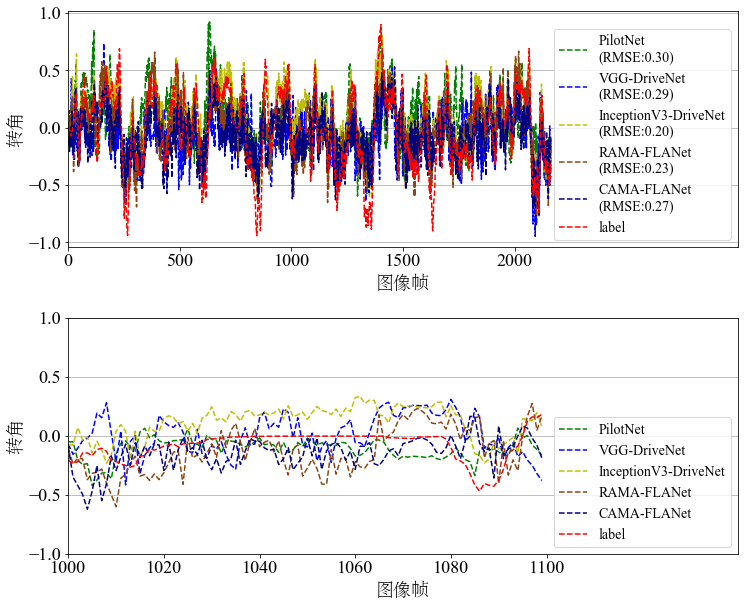

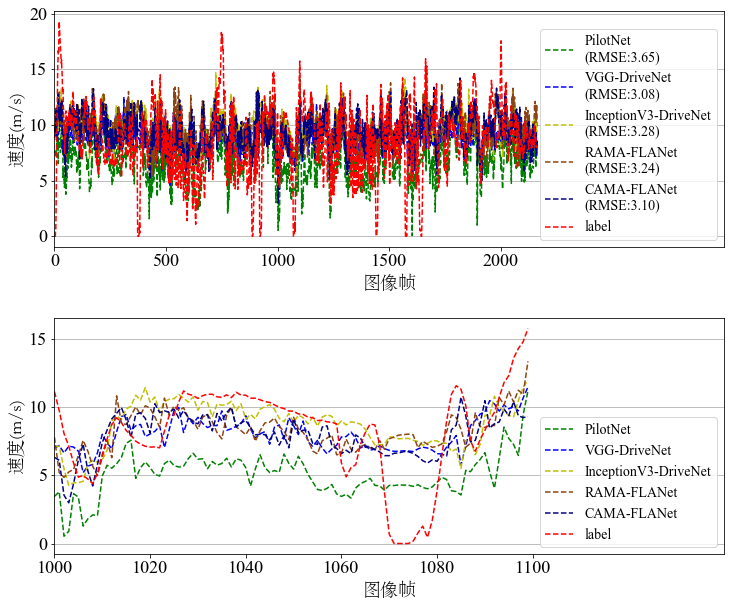

In [54]:
# plt.rc('font',family='Times New Roman') 
# plt.rc('font',size=18) 

font1 = {'family' : 'Times New Roman',
'weight' : 'black',
'size'   : 14}
font2 = {'family' : 'STSong',
'weight' : 'light',
'size'   : 18}
if_angle_filter = True
label_dir = "action_pose.txt"
# predict_dir1 = "prediction_comma_3channel_kivinet.log"
# predict_dir2 = "prediction_comma_vgg_kivi_3channel_kivinet.log"
# predict_dir3 = "prediction_comma_inception.log"
# predict_dir1 = "prediction_comma_vgg_transfer.log"
# predict_dir2 = "prediction_comma_inception.log"
# predict_dir3 = "prediction_comma_nvNet_5_7.log"
predict_dir0 = "prediction_udacity_vgg_transfer5_19.log"
predict_dir1 = "prediction_udacity_inception3_5_19.log"
predict_dir2 = "prediction_udacity_vgg_fla_pw_3channel_kivinet_5_19.log"
predict_dir3 = "prediction_udacity_nvNet_5_19.log"
predict_dir4 = "prediction_udacity_seg_fla_pw_3channel_kivinet_5_19.log"
def angle_filter(angle,filter_size = 11):
    filter = np.ones((1,filter_size),dtype=np.float)/filter_size
    for i in range(filter_size//2,angle.shape[0]-filter_size//2):
        mul = np.matmul(filter,angle[i-filter_size//2:i+filter_size//2+1,:])
        angle[i,:] = mul
    return np.squeeze(angle,axis=1)
def cal_RMSE(predict_np,label_np):
    label_np_cut = label_np[:predict_np.shape[0],:]
    RMSE_angle = math.sqrt(mean_squared_error(predict_np[:,0],label_np_cut[:,0]))
    RMSE_speed = math.sqrt(mean_squared_error(predict_np[:,1],label_np_cut[:,1]))
    return [RMSE_angle,RMSE_speed]
f_label = open(label_dir,'r')
f_label_lines = f_label.readlines()
label = np.zeros((len(f_label_lines),2))
for i,j in enumerate(f_label_lines):
    label[i][0] = float(j.split(",")[-2])
    label[i][1] = float(j.split(",")[-1])
f_label.close()
if if_angle_filter:
    label[:,0] = angle_filter(np.reshape(label[:,0],[-1,1]))
def get_predict_np(predict_dir):
    f_predict = open(predict_dir,'r')
    f_predict_lines = f_predict.readlines()
    angle_predict = []
    speed_predict = []
    train_data_index = []
    test_data_index = []
    count_train = 0
    count_test = 0
    for i in f_predict_lines:
        if i != "":
            angle_predict.append(float(i.split(",")[2]))
            speed_predict.append(float(i.split(",")[3]))
            if (i.split(",")[0]=='train'):
                train_data_index.append(int(i.split(",")[1][:-4]))
                count_train +=1
            else:
                test_data_index.append(int(i.split(",")[1][:-4]))
                count_test +=1
    predict_np = np.array([angle_predict,speed_predict]).T
    return [predict_np,count_train,count_test,test_data_index,angle_predict,speed_predict]
predict_np0,count_train0,count_test0,test_data_index0,angle_predict0,speed_predict0 = get_predict_np(predict_dir0)
predict_np1,count_train1,count_test1,test_data_index1,angle_predict1,speed_predict1 = get_predict_np(predict_dir1)
predict_np2,count_train2,count_test2,test_data_index2,angle_predict2,speed_predict2 = get_predict_np(predict_dir2)
predict_np3,count_train3,count_test3,test_data_index3,angle_predict3,speed_predict3 = get_predict_np(predict_dir3)
predict_np4,count_train4,count_test4,test_data_index4,angle_predict4,speed_predict4 = get_predict_np(predict_dir4)
# RMSE_angle_train,RMSE_speed_train = cal_RMSE(predict_np[:count_train],label[train_data_index])
RMSE_angle_test0,RMSE_speed_test0 = cal_RMSE(predict_np0[count_train0:],label[test_data_index0])
RMSE_angle_test1,RMSE_speed_test1 = cal_RMSE(predict_np1[count_train1:],label[test_data_index1])
RMSE_angle_test2,RMSE_speed_test2 = cal_RMSE(predict_np2[count_train1:],label[test_data_index2])
RMSE_angle_test3,RMSE_speed_test3 = cal_RMSE(predict_np3[count_train3:],label[test_data_index3])
RMSE_angle_test4,RMSE_speed_test4 = cal_RMSE(predict_np4[count_train4:],label[test_data_index4])
# print("Train angle RMSE:%s,Train speed RMSE:%s\n \
#     Test angle RMSE:%s,Test speed RMSE:%s"%(\
#         RMSE_angle_train,RMSE_speed_train,RMSE_angle_test,RMSE_speed_test))
#********  angle *********
#********  angle *********
plt.figure(figsize=(12,10))
plt.subplots_adjust(wspace =0.2, hspace =0.3)
plt.subplot(211)
plt.xlabel("图像帧",font2)
plt.ylabel("转角",font2)#Speed(m/s)
plt.grid(axis="y")
plt.xlim([0,3000])
plt.xticks(range(0,2001,500))

plt.plot(range(len(test_data_index3)),np.array(angle_predict3[count_train3:count_train3+count_test3]),label = "PilotNet\n(RMSE:%.2f)"%(RMSE_angle_test3), color='g', linestyle='--')
plt.plot(range(len(test_data_index0)),np.array(angle_predict0[count_train0:count_train0+count_test0]),label = "VGG-DriveNet\n(RMSE:%.2f)"%(RMSE_angle_test0), color='b', linestyle='--')
plt.plot(range(len(test_data_index1)),np.array(angle_predict1[count_train1:count_train1+count_test1]),label = "InceptionV3-DriveNet\n(RMSE:%.2f)"%(RMSE_angle_test1), color='y', linestyle='--')
plt.plot(range(len(test_data_index1)),np.array(angle_predict4[count_train4:count_train4+count_test4]),label = "RAMA-FLANet\n(RMSE:%.2f)"%(RMSE_angle_test4), color='saddlebrown', linestyle='--')
plt.plot(range(len(test_data_index1)),np.array(angle_predict2[count_train2:count_train2+count_test2]),label = "CAMA-FLANet\n(RMSE:%.2f)"%(RMSE_angle_test2), color='navy', linestyle='--')
plt.plot(range(len(test_data_index1)),label[test_data_index1,0],label = "label", color='r', linestyle='--')
plt.legend(loc=4,prop=font1)

plt.subplot(212)
plt.grid(axis="y")
plt.xlabel("图像帧(局部放大)",font2)
plt.ylabel("转角",font2)#Speed(m/s)
plt.xlim([1000,1140])
plt.xticks(range(1000,1101,20))
plt.ylim((-1,1))
list_min = 1000
list_max = 1100

plt.plot(range(1000,1000+len(test_data_index3[list_min:list_max])),np.array(angle_predict3[count_train3:count_train3+count_test3][list_min:list_max]),label = "PilotNet", color='g', linestyle='--')
plt.plot(range(1000,1000+len(test_data_index0[list_min:list_max])),np.array(angle_predict0[count_train0:count_train0+count_test0][list_min:list_max]),label = "VGG-DriveNet", color='b', linestyle='--')
plt.plot(range(1000,1000+len(test_data_index1[list_min:list_max])),np.array(angle_predict1[count_train1:count_train1+count_test1][list_min:list_max]),label = "InceptionV3-DriveNet", color='y', linestyle='--')
plt.plot(range(1000,1000+len(test_data_index1[list_min:list_max])),np.array(angle_predict4[count_train4:count_train4+count_test4][list_min:list_max]),label = "RAMA-FLANet", color='saddlebrown', linestyle='--')
plt.plot(range(1000,1000+len(test_data_index1[list_min:list_max])),np.array(angle_predict2[count_train2:count_train2+count_test2][list_min:list_max]),label = "CAMA-FLANet", color='navy', linestyle='--')
plt.plot(range(1000,1000+len(test_data_index1[list_min:list_max])),label[test_data_index1[list_min:list_max],0],label = "label", color='r', linestyle='--')
plt.legend(loc=4,prop=font1)
plt.savefig("co_a.png",dpi=500,bbox_inches = 'tight')
#********  speed *********
#********  speed *********
plt.figure(figsize=(12,10))
plt.subplots_adjust(wspace =0.2, hspace =0.3)
plt.subplot(211)
plt.xlabel("图像帧",font2)
plt.ylabel("速度(m/s)",font2)#Speed(m/s)
plt.grid(axis="y")
plt.xlim([0,3000])
# plt.ylim([20,40])
plt.xticks(range(0,2001,500))

plt.plot(range(len(test_data_index3)),np.array(speed_predict3[count_train3:count_train3+count_test3]),label = "PilotNet\n(RMSE:%.2f)"%(RMSE_speed_test3), color='g', linestyle='--')
plt.plot(range(len(test_data_index0)),np.array(speed_predict0[count_train0:count_train0+count_test0]),label = "VGG-DriveNet\n(RMSE:%.2f)"%(RMSE_speed_test0), color='b', linestyle='--')
plt.plot(range(len(test_data_index1)),np.array(speed_predict1[count_train1:count_train1+count_test1]),label = "InceptionV3-DriveNet\n(RMSE:%.2f)"%(RMSE_speed_test1), color='y', linestyle='--')
plt.plot(range(len(test_data_index1)),np.array(speed_predict4[count_train4:count_train4+count_test4]),label = "RAMA-FLANet\n(RMSE:%.2f)"%(RMSE_speed_test4), color='saddlebrown', linestyle='--')
plt.plot(range(len(test_data_index1)),np.array(speed_predict2[count_train2:count_train2+count_test2]),label = "CAMA-FLANet\n(RMSE:%.2f)"%(RMSE_speed_test2), color='navy', linestyle='--')
plt.plot(range(len(test_data_index1)),label[test_data_index1,1],label = "label", color='r', linestyle='--')
plt.legend(loc=4,prop=font1)

plt.subplot(212)
plt.grid(axis="y")
plt.xlabel("图像帧",font2)
plt.ylabel("速度(m/s)",font2)#Speed(m/s)
plt.xlim([1000,1140])
# plt.ylim([20,40])
plt.xticks(range(1000,1101,20))
list_min = 1000
list_max = 1100

plt.plot(range(1000,1000+len(test_data_index3[list_min:list_max])),np.array(speed_predict3[count_train3:count_train3+count_test3][list_min:list_max]),label = "PilotNet", color='g', linestyle='--')
plt.plot(range(1000,1000+len(test_data_index0[list_min:list_max])),np.array(speed_predict0[count_train0:count_train0+count_test0][list_min:list_max]),label = "VGG-DriveNet", color='b', linestyle='--')
plt.plot(range(1000,1000+len(test_data_index1[list_min:list_max])),np.array(speed_predict1[count_train1:count_train1+count_test1][list_min:list_max]),label = "InceptionV3-DriveNet", color='y', linestyle='--')
plt.plot(range(1000,1000+len(test_data_index4[list_min:list_max])),np.array(speed_predict4[count_train4:count_train4+count_test4][list_min:list_max]),label = "RAMA-FLANet", color='saddlebrown', linestyle='--')
plt.plot(range(1000,1000+len(test_data_index1[list_min:list_max])),np.array(speed_predict2[count_train2:count_train2+count_test2][list_min:list_max]),label = "CAMA-FLANet", color='navy', linestyle='--')
plt.plot(range(1000,1000+len(test_data_index1[list_min:list_max])),label[test_data_index1[list_min:list_max],1],label = "label", color='r', linestyle='--')
plt.legend(loc=4,prop=font1)
plt.savefig("co_s.png",dpi=500,bbox_inches = 'tight')
plt.show()

### comma绘制实验对比图

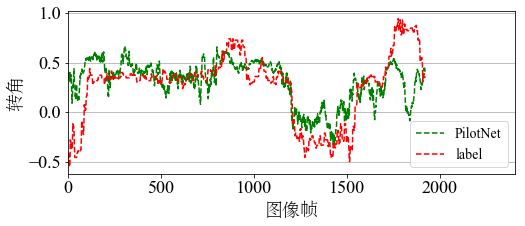

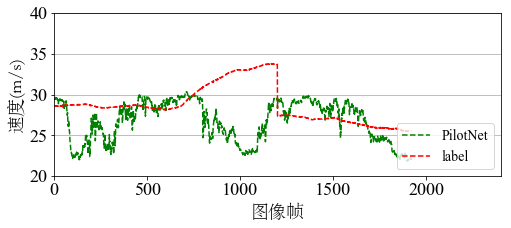

In [28]:
# plt.rc('font',family='Times New Roman') 
# plt.rc('font',size=18) 

font1 = {'family' : 'Times New Roman',
'weight' : 'black',
'size'   : 14}
font2 = {'family' : 'STSong',
'weight' : 'light',
'size'   : 18}
if_angle_filter = False
if_label_random = False
label_dir = "comma_label_ds.txt"
# predict_dir1 = "prediction_comma_3channel_kivinet.log"
# predict_dir2 = "prediction_comma_vgg_kivi_3channel_kivinet.log"
# predict_dir3 = "prediction_comma_inception.log"
# predict_dir1 = "prediction_comma_vgg_transfer.log"
# predict_dir2 = "prediction_comma_inception.log"
# predict_dir3 = "prediction_comma_nvNet_5_7.log"
predict_dir0 = "prediction_comma_vgg_transfer_5_19.log"
predict_dir1 = "prediction_comma_inception5_19.log"
predict_dir2 = "prediction_comma_vgg_fla_3channel_kivinet_5_19.log"
predict_dir3 = "prediction_comma_nvNet_5_19.log"
predict_dir4 = "prediction_comma_seg_fla_3channel_kivinet_5_19.log"
def angle_filter(angle,filter_size = 11):
    filter = np.ones((1,filter_size),dtype=np.float)/filter_size
    for i in range(filter_size//2,angle.shape[0]-filter_size//2):
        mul = np.matmul(filter,angle[i-filter_size//2:i+filter_size//2+1,:])
        angle[i,:] = mul
    return np.squeeze(angle,axis=1)
def cal_RMSE(predict_np,label_np):
    label_np_cut = label_np[:predict_np.shape[0],:]
    RMSE_angle = math.sqrt(mean_squared_error(predict_np[:,0],label_np_cut[:,0]))
    RMSE_speed = math.sqrt(mean_squared_error(predict_np[:,1],label_np_cut[:,1]))
    return [RMSE_angle,RMSE_speed]
f_label = open(label_dir,'r')
f_label_lines = f_label.readlines()
label = np.zeros((len(f_label_lines),2))
for i,j in enumerate(f_label_lines):
    label[i][0] = float(j.split(",")[-2])
    label[i][1] = float(j.split(",")[-1])
f_label.close()
if if_angle_filter:
    label[:,0] = angle_filter(np.reshape(label[:,0],[-1,1]))
if if_label_random:
    label[:,0] = label[:,0]#+np.random.randn(len(label))/10
    label[0:-1:20,1] = label[0:-1:20,1]+np.random.randn(len(label)//20)/5
def get_predict_np(predict_dir):
    f_predict = open(predict_dir,'r')
    f_predict_lines = f_predict.readlines()
    angle_predict = []
    speed_predict = []
    train_data_index = []
    test_data_index = []
    count_train = 0
    count_test = 0
    for i in f_predict_lines:
        if i != "":
            angle_predict.append(float(i.split(",")[2]))
            speed_predict.append(float(i.split(",")[3]))
            if (i.split(",")[0]=='train'):
                train_data_index.append(int(i.split(",")[1][:-4]))
                count_train +=1
            else:
                test_data_index.append(int(i.split(",")[1][:-4]))
                count_test +=1
    predict_np = np.array([angle_predict,speed_predict]).T
    return [predict_np,count_train,count_test,test_data_index,angle_predict,speed_predict]
predict_np0,count_train0,count_test0,test_data_index0,angle_predict0,speed_predict0 = get_predict_np(predict_dir0)
predict_np1,count_train1,count_test1,test_data_index1,angle_predict1,speed_predict1 = get_predict_np(predict_dir1)
predict_np2,count_train2,count_test2,test_data_index2,angle_predict2,speed_predict2 = get_predict_np(predict_dir2)
predict_np3,count_train3,count_test3,test_data_index3,angle_predict3,speed_predict3 = get_predict_np(predict_dir3)
predict_np4,count_train4,count_test4,test_data_index4,angle_predict4,speed_predict4 = get_predict_np(predict_dir4)
# RMSE_angle_train,RMSE_speed_train = cal_RMSE(predict_np[:count_train],label[train_data_index])
RMSE_angle_test0,RMSE_speed_test0 = cal_RMSE(predict_np0[count_train0:],label[test_data_index0])
RMSE_angle_test1,RMSE_speed_test1 = cal_RMSE(predict_np1[count_train1:],label[test_data_index1])
RMSE_angle_test2,RMSE_speed_test2 = cal_RMSE(predict_np2[count_train1:],label[test_data_index2])
RMSE_angle_test3,RMSE_speed_test3 = cal_RMSE(predict_np3[count_train3:],label[test_data_index3])
RMSE_angle_test4,RMSE_speed_test4 = cal_RMSE(predict_np4[count_train4:],label[test_data_index4])
# print("Train angle RMSE:%s,Train speed RMSE:%s\n \
#     Test angle RMSE:%s,Test speed RMSE:%s"%(\
#         RMSE_angle_train,RMSE_speed_train,RMSE_angle_test,RMSE_speed_test))
#********  angle *********
#********  angle *********
plt.figure(figsize=(8,3))

plt.xlabel("图像帧",font2)
plt.ylabel("转角",font2)#Speed(m/s)
plt.grid(axis="y")
plt.xlim([0,2400])
plt.xticks(range(0,2001,500))

plt.plot(range(len(test_data_index3)),np.array(angle_predict3[count_train3:count_train3+count_test3]),label = "PilotNet", color='g', linestyle='--')
plt.plot(range(len(test_data_index1)),label[test_data_index1,0],label = "label", color='r', linestyle='--')
plt.legend(loc=4,prop=font1)
plt.savefig("co_a.png",dpi=500,bbox_inches = 'tight')
#********  speed *********
#********  speed *********
plt.figure(figsize=(8,3))
plt.xlabel("图像帧",font2)
plt.ylabel("速度(m/s)",font2)#Speed(m/s)
plt.grid(axis="y")
plt.xlim([0,2400])
plt.ylim([20,40])
plt.xticks(range(0,2001,500))

plt.plot(range(len(test_data_index3)),np.array(speed_predict3[count_train3:count_train3+count_test3]),label = "PilotNet", color='g', linestyle='--')
plt.plot(range(len(test_data_index1)),label[test_data_index1,1],label = "label", color='r', linestyle='--')
plt.legend(loc=4,prop=font1)

plt.savefig("co_s.png",dpi=500,bbox_inches = 'tight')
plt.show()


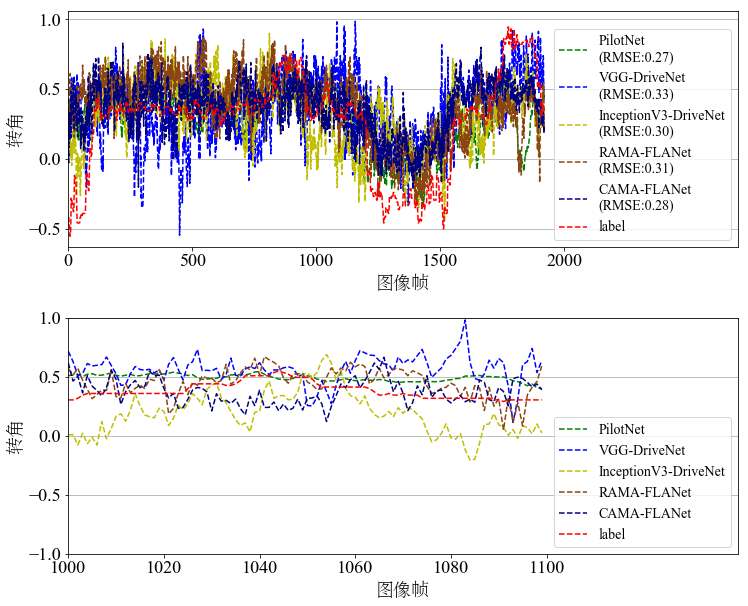

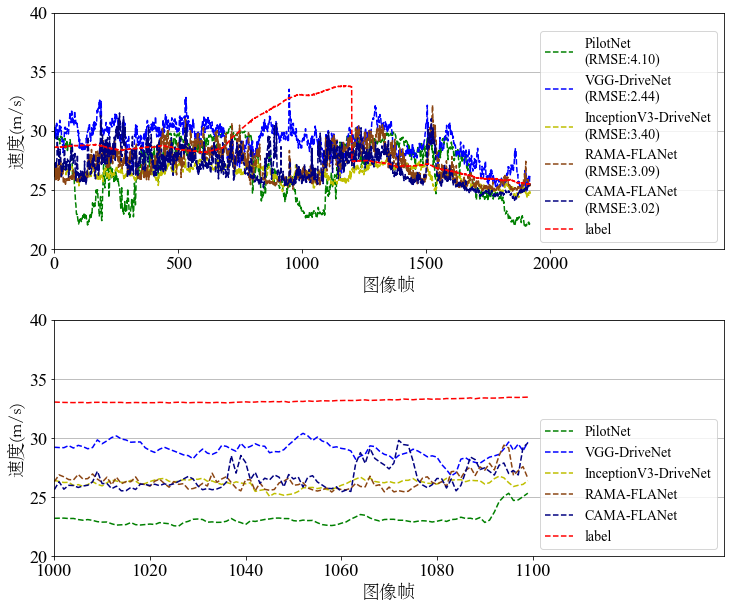

In [53]:
# plt.rc('font',family='Times New Roman') 
# plt.rc('font',size=18) 

font1 = {'family' : 'Times New Roman',
'weight' : 'black',
'size'   : 14}
font2 = {'family' : 'STSong',
'weight' : 'light',
'size'   : 18}
if_angle_filter = False
if_label_random = False
label_dir = "comma_label_ds.txt"
# predict_dir1 = "prediction_comma_3channel_kivinet.log"
# predict_dir2 = "prediction_comma_vgg_kivi_3channel_kivinet.log"
# predict_dir3 = "prediction_comma_inception.log"
# predict_dir1 = "prediction_comma_vgg_transfer.log"
# predict_dir2 = "prediction_comma_inception.log"
# predict_dir3 = "prediction_comma_nvNet_5_7.log"
predict_dir0 = "prediction_comma_vgg_transfer_5_19.log"
predict_dir1 = "prediction_comma_inception5_19.log"
predict_dir2 = "prediction_comma_vgg_fla_pw_3channel_kivinet_5_19.log"
predict_dir3 = "prediction_comma_nvNet_5_19.log"
predict_dir4 = "prediction_comma_seg_fla_pw_3channel_kivinet_5_19.log"
def angle_filter(angle,filter_size = 11):
    filter = np.ones((1,filter_size),dtype=np.float)/filter_size
    for i in range(filter_size//2,angle.shape[0]-filter_size//2):
        mul = np.matmul(filter,angle[i-filter_size//2:i+filter_size//2+1,:])
        angle[i,:] = mul
    return np.squeeze(angle,axis=1)
def cal_RMSE(predict_np,label_np):
    label_np_cut = label_np[:predict_np.shape[0],:]
    RMSE_angle = math.sqrt(mean_squared_error(predict_np[:,0],label_np_cut[:,0]))
    RMSE_speed = math.sqrt(mean_squared_error(predict_np[:,1],label_np_cut[:,1]))
    return [RMSE_angle,RMSE_speed]
f_label = open(label_dir,'r')
f_label_lines = f_label.readlines()
label = np.zeros((len(f_label_lines),2))
for i,j in enumerate(f_label_lines):
    label[i][0] = float(j.split(",")[-2])
    label[i][1] = float(j.split(",")[-1])
f_label.close()
if if_angle_filter:
    label[:,0] = angle_filter(np.reshape(label[:,0],[-1,1]))
if if_label_random:
    label[:,0] = label[:,0]#+np.random.randn(len(label))/10
    label[0:-1:20,1] = label[0:-1:20,1]+np.random.randn(len(label)//20)/5
def get_predict_np(predict_dir):
    f_predict = open(predict_dir,'r')
    f_predict_lines = f_predict.readlines()
    angle_predict = []
    speed_predict = []
    train_data_index = []
    test_data_index = []
    count_train = 0
    count_test = 0
    for i in f_predict_lines:
        if i != "":
            angle_predict.append(float(i.split(",")[2]))
            speed_predict.append(float(i.split(",")[3]))
            if (i.split(",")[0]=='train'):
                train_data_index.append(int(i.split(",")[1][:-4]))
                count_train +=1
            else:
                test_data_index.append(int(i.split(",")[1][:-4]))
                count_test +=1
    predict_np = np.array([angle_predict,speed_predict]).T
    return [predict_np,count_train,count_test,test_data_index,angle_predict,speed_predict]
predict_np0,count_train0,count_test0,test_data_index0,angle_predict0,speed_predict0 = get_predict_np(predict_dir0)
predict_np1,count_train1,count_test1,test_data_index1,angle_predict1,speed_predict1 = get_predict_np(predict_dir1)
predict_np2,count_train2,count_test2,test_data_index2,angle_predict2,speed_predict2 = get_predict_np(predict_dir2)
predict_np3,count_train3,count_test3,test_data_index3,angle_predict3,speed_predict3 = get_predict_np(predict_dir3)
predict_np4,count_train4,count_test4,test_data_index4,angle_predict4,speed_predict4 = get_predict_np(predict_dir4)
# RMSE_angle_train,RMSE_speed_train = cal_RMSE(predict_np[:count_train],label[train_data_index])
RMSE_angle_test0,RMSE_speed_test0 = cal_RMSE(predict_np0[count_train0:],label[test_data_index0])
RMSE_angle_test1,RMSE_speed_test1 = cal_RMSE(predict_np1[count_train1:],label[test_data_index1])
RMSE_angle_test2,RMSE_speed_test2 = cal_RMSE(predict_np2[count_train1:],label[test_data_index2])
RMSE_angle_test3,RMSE_speed_test3 = cal_RMSE(predict_np3[count_train3:],label[test_data_index3])
RMSE_angle_test4,RMSE_speed_test4 = cal_RMSE(predict_np4[count_train4:],label[test_data_index4])
# print("Train angle RMSE:%s,Train speed RMSE:%s\n \
#     Test angle RMSE:%s,Test speed RMSE:%s"%(\
#         RMSE_angle_train,RMSE_speed_train,RMSE_angle_test,RMSE_speed_test))
#********  angle *********
#********  angle *********
plt.figure(figsize=(12,10))
plt.subplots_adjust(wspace =0.2, hspace =0.3)
plt.subplot(211)
plt.xlabel("图像帧",font2)
plt.ylabel("转角",font2)#Speed(m/s)
plt.grid(axis="y")
plt.xlim([0,2700])
plt.xticks(range(0,2001,500))

plt.plot(range(len(test_data_index3)),np.array(angle_predict3[count_train3:count_train3+count_test3]),label = "PilotNet\n(RMSE:%.2f)"%(RMSE_angle_test3), color='g', linestyle='--')
plt.plot(range(len(test_data_index0)),np.array(angle_predict0[count_train0:count_train0+count_test0]),label = "VGG-DriveNet\n(RMSE:%.2f)"%(RMSE_angle_test0), color='b', linestyle='--')
plt.plot(range(len(test_data_index1)),np.array(angle_predict1[count_train1:count_train1+count_test1]),label = "InceptionV3-DriveNet\n(RMSE:%.2f)"%(RMSE_angle_test1), color='y', linestyle='--')
plt.plot(range(len(test_data_index1)),np.array(angle_predict4[count_train4:count_train4+count_test4]),label = "RAMA-FLANet\n(RMSE:%.2f)"%(RMSE_angle_test4), color='saddlebrown', linestyle='--')
plt.plot(range(len(test_data_index1)),np.array(angle_predict2[count_train2:count_train2+count_test2]),label = "CAMA-FLANet\n(RMSE:%.2f)"%(RMSE_angle_test2), color='navy', linestyle='--')
plt.plot(range(len(test_data_index1)),label[test_data_index1,0],label = "label", color='r', linestyle='--')
plt.legend(loc=4,prop=font1)

plt.subplot(212)
plt.grid(axis="y")
plt.xlabel("图像帧",font2)
plt.ylabel("转角",font2)#Speed(m/s)
plt.xlim([1000,1140])
plt.xticks(range(1000,1101,20))
plt.ylim((-1,1))
list_min = 1000
list_max = 1100

plt.plot(range(1000,1000+len(test_data_index3[list_min:list_max])),np.array(angle_predict3[count_train3:count_train3+count_test3][list_min:list_max]),label = "PilotNet", color='g', linestyle='--')
plt.plot(range(1000,1000+len(test_data_index0[list_min:list_max])),np.array(angle_predict0[count_train0:count_train0+count_test0][list_min:list_max]),label = "VGG-DriveNet", color='b', linestyle='--')
plt.plot(range(1000,1000+len(test_data_index1[list_min:list_max])),np.array(angle_predict1[count_train1:count_train1+count_test1][list_min:list_max]),label = "InceptionV3-DriveNet", color='y', linestyle='--')
plt.plot(range(1000,1000+len(test_data_index1[list_min:list_max])),np.array(angle_predict4[count_train4:count_train4+count_test4][list_min:list_max]),label = "RAMA-FLANet", color='saddlebrown', linestyle='--')
plt.plot(range(1000,1000+len(test_data_index1[list_min:list_max])),np.array(angle_predict2[count_train2:count_train2+count_test2][list_min:list_max]),label = "CAMA-FLANet", color='navy', linestyle='--')
plt.plot(range(1000,1000+len(test_data_index1[list_min:list_max])),label[test_data_index1[list_min:list_max],0],label = "label", color='r', linestyle='--')
plt.legend(loc=4,prop=font1)
plt.savefig("co_a.png",dpi=500,bbox_inches = 'tight')
#********  speed *********
#********  speed *********
plt.figure(figsize=(12,10))
plt.subplots_adjust(wspace =0.2, hspace =0.3)
plt.subplot(211)
plt.xlabel("图像帧",font2)
plt.ylabel("速度(m/s)",font2)#Speed(m/s)
plt.grid(axis="y")
plt.xlim([0,2700])
plt.ylim([20,40])
plt.xticks(range(0,2001,500))

plt.plot(range(len(test_data_index3)),np.array(speed_predict3[count_train3:count_train3+count_test3]),label = "PilotNet\n(RMSE:%.2f)"%(RMSE_speed_test3), color='g', linestyle='--')
plt.plot(range(len(test_data_index0)),np.array(speed_predict0[count_train0:count_train0+count_test0]),label = "VGG-DriveNet\n(RMSE:%.2f)"%(RMSE_speed_test0), color='b', linestyle='--')
plt.plot(range(len(test_data_index1)),np.array(speed_predict1[count_train1:count_train1+count_test1]),label = "InceptionV3-DriveNet\n(RMSE:%.2f)"%(RMSE_speed_test1), color='y', linestyle='--')
plt.plot(range(len(test_data_index1)),np.array(speed_predict4[count_train4:count_train4+count_test4]),label = "RAMA-FLANet\n(RMSE:%.2f)"%(RMSE_speed_test4), color='saddlebrown', linestyle='--')
plt.plot(range(len(test_data_index1)),np.array(speed_predict2[count_train2:count_train2+count_test2]),label = "CAMA-FLANet\n(RMSE:%.2f)"%(RMSE_speed_test2), color='navy', linestyle='--')
plt.plot(range(len(test_data_index1)),label[test_data_index1,1],label = "label", color='r', linestyle='--')
plt.legend(loc=4,prop=font1)

plt.subplot(212)
plt.grid(axis="y")
plt.xlabel("图像帧",font2)
plt.ylabel("速度(m/s)",font2)#Speed(m/s)
plt.xlim([1000,1140])
plt.ylim([20,40])
plt.xticks(range(1000,1101,20))
list_min = 1000
list_max = 1100

plt.plot(range(1000,1000+len(test_data_index3[list_min:list_max])),np.array(speed_predict3[count_train3:count_train3+count_test3][list_min:list_max]),label = "PilotNet", color='g', linestyle='--')
plt.plot(range(1000,1000+len(test_data_index0[list_min:list_max])),np.array(speed_predict0[count_train0:count_train0+count_test0][list_min:list_max]),label = "VGG-DriveNet", color='b', linestyle='--')
plt.plot(range(1000,1000+len(test_data_index1[list_min:list_max])),np.array(speed_predict1[count_train1:count_train1+count_test1][list_min:list_max]),label = "InceptionV3-DriveNet", color='y', linestyle='--')
plt.plot(range(1000,1000+len(test_data_index4[list_min:list_max])),np.array(speed_predict4[count_train4:count_train4+count_test4][list_min:list_max]),label = "RAMA-FLANet", color='saddlebrown', linestyle='--')
plt.plot(range(1000,1000+len(test_data_index1[list_min:list_max])),np.array(speed_predict2[count_train2:count_train2+count_test2][list_min:list_max]),label = "CAMA-FLANet", color='navy', linestyle='--')
plt.plot(range(1000,1000+len(test_data_index1[list_min:list_max])),label[test_data_index1[list_min:list_max],1],label = "label", color='r', linestyle='--')
plt.legend(loc=4,prop=font1)
plt.savefig("co_s.png",dpi=500,bbox_inches = 'tight')
plt.show()


### lstm loss

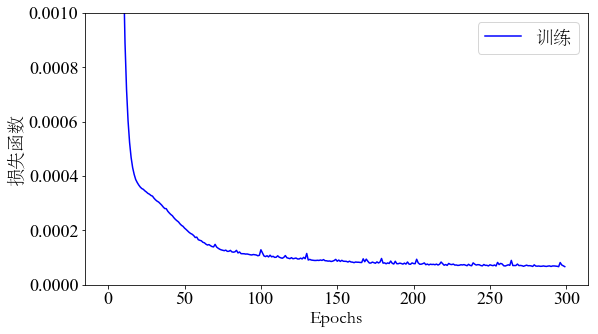

In [2]:
font1 = {'family' : 'Times New Roman',
'weight' : 'black',
'size'   : 14}
font2 = {'family' : 'STSong',
'weight' : 'light',
'size'   : 18}
train_loss_name = "no_picture_esti/ca_test.csv"
test_loss_name = "no_picture_esti/ca_train.csv"
f_train = open(train_loss_name,"r").readlines()
f_test = open(test_loss_name,"r").readlines()
train_list = [float(i.split(",")[-1]) for i in f_train[1:]]
test_list = [float(j.split(",")[-1]) for j in f_test[1:]]
# plt.figure(figsize=(4,3))
plt.figure(figsize=(9,5))
# plt.subplots_adjust(wspace =0.4, hspace =0.4)
plt.xlabel("Epochs",font2)
plt.ylabel("损失函数",font2)
# plt.grid(axis="y")
plt.ylim([0,0.001])
# plt.xticks(range(0,2001,500))
# plt.plot(range(len(test_list)),test_list,color="green",label="测试")
plt.plot(range(len(train_list)),train_list,color="b",label="训练")
plt.legend(loc=1,prop=font2)

plt.savefig("co.jpg",dpi=500,bbox_inches = 'tight')

# plt.subplot(212)
# plt.xlabel("Epochs")
# plt.ylabel("Test Loss")
# plt.ylim([0,0.0005])

# plt.grid(axis="y")
# semilogy(list(range(len(loss_test_epochs[:25]))),loss_test_epochs[:25],color='r')
# plt.savefig("co1.jpg",dpi=500,bbox_inches = 'tight')
plt.show()

### lstm rmse

Train Score of angle: 0.01 RMSE,Train Score of speed: 0.14 RMSE
Test Score of angle: 0.01 RMSE,Test Score of speed: 0.16 RMSE


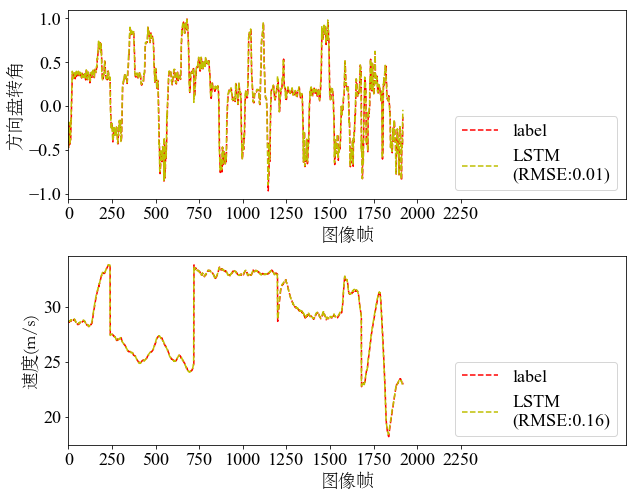

In [16]:
"""
import library
"""
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.callbacks import TensorBoard
plt.rc('font',family='Times New Roman') 
plt.rc('font',size=18) 
font1 = {'family' : 'Times New Roman',
'weight' : 'black',
'size'   : 14}
font2 = {'family' : 'STSong',
'weight' : 'light',
'size'   : 18}
# fix random seed for reproducibility
train_from_begin = False
# label_dir = "no_picture_esti/action_pose.txt"
label_dir = "no_picture_esti/comma_label_ds.txt"
epochs = 300
model_name = "no_picture_esti/lstm_model_comma.h5"
look_back = 6
train_test_ratio = 5
data_cut = False	
data_cut_num = 4350
def angle_filter(angle,filter_size = 11):
    filter = np.ones((1,filter_size),dtype=np.float)/filter_size
    for i in range(filter_size//2,angle.shape[0]-filter_size//2):
        mul = np.matmul(filter,angle[i-filter_size//2:i+filter_size//2+1,:])
        angle[i,:] = mul
    return np.squeeze(angle,axis=1)

f_label = open(label_dir,'r')
f_label_lines = f_label.readlines()
if data_cut:
	f_label_lines = f_label_lines[:data_cut_num]
label = np.zeros((len(f_label_lines),2))
for i,j in enumerate(f_label_lines):
    label[i][0] = float(j.split(",")[-2])
    label[i][1] = float(j.split(",")[-1])
f_label.close()
label[:,0] = angle_filter(np.reshape(label[:,0],[-1,1]))
dataset = label

# split into train and test sets
# train_size = int(dataset.shape[0] * 0.8)
# test_size = dataset.shape[0] - train_size
# train, test = dataset[0:train_size,:], dataset[train_size:dataset.shape[0],:]
# print ("train_data_size: "+str(len(train)), " test_data_size: "+str(len(test)))

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back):
	dataX = np.zeros((len(dataset)-look_back-1,look_back,2))
	dataY = np.zeros((len(dataset)-look_back-1,2))
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back),:]
		dataX[i] = a
		b = dataset[i + look_back,:]
		dataY[i] = b
	return dataX.swapaxes(1,2), dataY


# reshape into X=t and Y=t+1
scaler = MinMaxScaler().fit(dataset)
dataset_scalar = scaler.transform(dataset)
dataset_all_X, dataset_all_Y = create_dataset(dataset_scalar, look_back)
train_read_index = list(range(dataset_all_X.shape[0]))
test_read_index = [i for i in list(range(0,dataset_all_X.shape[0],train_test_ratio))]
train_read_index = [j for j in train_read_index if j not in test_read_index]
trainX = dataset_all_X[train_read_index,:,:]
trainY = dataset_all_Y[train_read_index,:]
testX = dataset_all_X[test_read_index,:,:]
testY = dataset_all_Y[test_read_index,:]
train_Y_original = scaler.inverse_transform(trainY)
test_Y_original = scaler.inverse_transform(testY)


if train_from_begin:
	# create and fit the LSTM network
	model = Sequential()
	model.add(LSTM(4, input_dim=look_back))
	model.add(Dense(2))
	model.compile(loss='mean_squared_error', optimizer='adam')
	model.fit(trainX, trainY, nb_epoch=epochs, batch_size=64, validation_data = (testX,testY),verbose=2,callbacks=[TensorBoard(log_dir='run_udacity')])
	model.save(model_name)
else:
	model = load_model(model_name)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)
# invert predictions
# trainPredict = scaler.inverse_transform(trainPredict)
# trainY = scaler.inverse_transform([trainY])
# testPredict = scaler.inverse_transform(testPredict)
# testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore_a = math.sqrt(mean_squared_error(train_Y_original[:,0], trainPredict[:,0]))
trainScore_s = math.sqrt(mean_squared_error(train_Y_original[:,1], trainPredict[:,1]))
print('Train Score of angle: %.2f RMSE,Train Score of speed: %.2f RMSE' % (trainScore_a,trainScore_s))
testScore_a = math.sqrt(mean_squared_error(test_Y_original[:,0], testPredict[:,0]))
testScore_s = math.sqrt(mean_squared_error(test_Y_original[:,1], testPredict[:,1]))
print('Test Score of angle: %.2f RMSE,Test Score of speed: %.2f RMSE' % (testScore_a,testScore_s))

plt.figure(figsize=(10,8))
plt.subplots_adjust(wspace =0, hspace =0.3)

plt.subplot(211)
# plt.title("angle_compare,RMSE test:%.2f"%(testScore_a))
plt.xlabel("图像帧",font2)
plt.ylabel("方向盘转角",font2)
plt.xlim([0,3200])
plt.xticks(range(0,2301,250))
plt.plot(range(len(test_read_index)),dataset[test_read_index,0],label = "label", color='r', linestyle='--')
plt.plot(range(len(test_read_index)),\
	testPredict[:,0],label = "LSTM\n(RMSE:%.2f)"%(testScore_a), color='y', linestyle='--')
plt.legend(loc=4)


plt.subplot(212)
# plt.title("speed_compare,RMSE test:%.2f"%(testScore_s))
plt.xlabel("图像帧",font2)
plt.ylabel("速度(m/s)",font2)
plt.xlim([0,3200])
plt.xticks(range(0,2301,250))
plt.plot(range(len(test_read_index)),dataset[test_read_index,1],label = "label", color='r', linestyle='--')
plt.plot(range(len(test_read_index)),\
	testPredict[:,1],label = "LSTM\n(RMSE:%.2f)"%(testScore_s), color='y', linestyle='--')
plt.legend(loc=4)
plt.savefig("LSTM_ud.jpg",dpi=500,bbox_inches = 'tight')

plt.show()





Train Score of angle: 0.02 RMSE,Train Score of speed: 0.14 RMSE
Test Score of angle: 0.03 RMSE,Test Score of speed: 0.16 RMSE


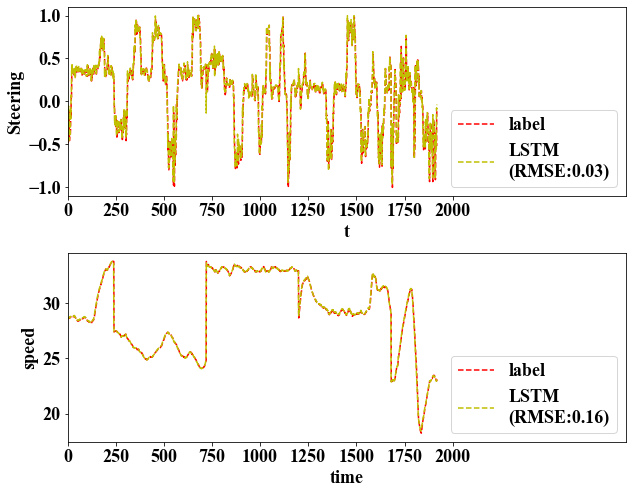

In [21]:

import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.callbacks import TensorBoard
plt.rc('font',family='Times New Roman') 
plt.rc('font',size=18) 

train_from_begin = False
label_dir = "no_picture_esti/comma_label_ds.txt"
epochs = 300
model_name = "no_picture_esti/lstm_model_comma.h5"
look_back = 6
train_test_ratio = 5
data_cut = False	
data_cut_num = 4350
def angle_filter(angle,filter_size = 11):
    filter = np.ones((1,filter_size),dtype=np.float)/filter_size
    for i in range(filter_size//2,angle.shape[0]-filter_size//2):
        mul = np.matmul(filter,angle[i-filter_size//2:i+filter_size//2+1,:])
        angle[i,:] = mul
    return np.squeeze(angle,axis=1)

f_label = open(label_dir,'r')
f_label_lines = f_label.readlines()
if data_cut:
	f_label_lines = f_label_lines[:data_cut_num]
label = np.zeros((len(f_label_lines),2))
for i,j in enumerate(f_label_lines):
    label[i][0] = float(j.split(",")[-2])
    label[i][1] = float(j.split(",")[-1])
f_label.close()
# label[:,0] = angle_filter(np.reshape(label[:,0],[-1,1]))
dataset = label

# split into train and test sets
# train_size = int(dataset.shape[0] * 0.8)
# test_size = dataset.shape[0] - train_size
# train, test = dataset[0:train_size,:], dataset[train_size:dataset.shape[0],:]
# print ("train_data_size: "+str(len(train)), " test_data_size: "+str(len(test)))

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back):
	dataX = np.zeros((len(dataset)-look_back-1,look_back,2))
	dataY = np.zeros((len(dataset)-look_back-1,2))
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back),:]
		dataX[i] = a
		b = dataset[i + look_back,:]
		dataY[i] = b
	return dataX.swapaxes(1,2), dataY


# reshape into X=t and Y=t+1
scaler = MinMaxScaler().fit(dataset)
dataset_scalar = scaler.transform(dataset)
dataset_all_X, dataset_all_Y = create_dataset(dataset_scalar, look_back)
train_read_index = list(range(dataset_all_X.shape[0]))
test_read_index = [i for i in list(range(0,dataset_all_X.shape[0],train_test_ratio))]
train_read_index = [j for j in train_read_index if j not in test_read_index]
trainX = dataset_all_X[train_read_index,:,:]
trainY = dataset_all_Y[train_read_index,:]
testX = dataset_all_X[test_read_index,:,:]
testY = dataset_all_Y[test_read_index,:]
train_Y_original = scaler.inverse_transform(trainY)
test_Y_original = scaler.inverse_transform(testY)

if train_from_begin:
	# create and fit the LSTM network
	model = Sequential()
	model.add(LSTM(4, input_dim=look_back))
	model.add(Dense(2))
	model.compile(loss='mean_squared_error', optimizer='adam')
	model.fit(trainX, trainY, nb_epoch=epochs, batch_size=64, validation_data = (testX,testY),verbose=2,callbacks=[TensorBoard(log_dir='run_comma')])
	model.save(model_name)
else:
	model = load_model(model_name)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)
# invert predictions
# trainPredict = scaler.inverse_transform(trainPredict)
# trainY = scaler.inverse_transform([trainY])
# testPredict = scaler.inverse_transform(testPredict)
# testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore_a = math.sqrt(mean_squared_error(train_Y_original[:,0], trainPredict[:,0]))
trainScore_s = math.sqrt(mean_squared_error(train_Y_original[:,1], trainPredict[:,1]))
print('Train Score of angle: %.2f RMSE,Train Score of speed: %.2f RMSE' % (trainScore_a,trainScore_s))
testScore_a = math.sqrt(mean_squared_error(test_Y_original[:,0], testPredict[:,0]))
testScore_s = math.sqrt(mean_squared_error(test_Y_original[:,1], testPredict[:,1]))
print('Test Score of angle: %.2f RMSE,Test Score of speed: %.2f RMSE' % (testScore_a,testScore_s))

plt.figure(figsize=(10,8))
plt.subplots_adjust(wspace =0, hspace =0.3)

plt.subplot(211)
# plt.title("angle_compare,RMSE test:%.2f"%(testScore_a))
plt.xlabel("t")
plt.ylabel("Steering")
plt.xlim([0,2900])
plt.xticks(range(0,2001,250))
plt.plot(range(len(test_read_index)),dataset[test_read_index,0],label = "label", color='r', linestyle='--')
plt.plot(range(len(test_read_index)),\
	testPredict[:,0],label = "LSTM\n(RMSE:%.2f)"%(testScore_a), color='y', linestyle='--')
plt.legend(loc=4)


plt.subplot(212)
# plt.title("speed_compare,RMSE test:%.2f"%(testScore_s))
plt.xlabel("time")
plt.ylabel("speed")
plt.xlim([0,2900])
plt.xticks(range(0,2001,250))
plt.plot(range(len(test_read_index)),dataset[test_read_index,1],label = "label", color='r', linestyle='--')
plt.plot(range(len(test_read_index)),\
	testPredict[:,1],label = "LSTM\n(RMSE:%.2f)"%(testScore_s), color='y', linestyle='--')
plt.legend(loc=4)
plt.savefig("LSTM_co.jpg",dpi=500,bbox_inches = 'tight')

plt.show()





### lstm_conv_rmse

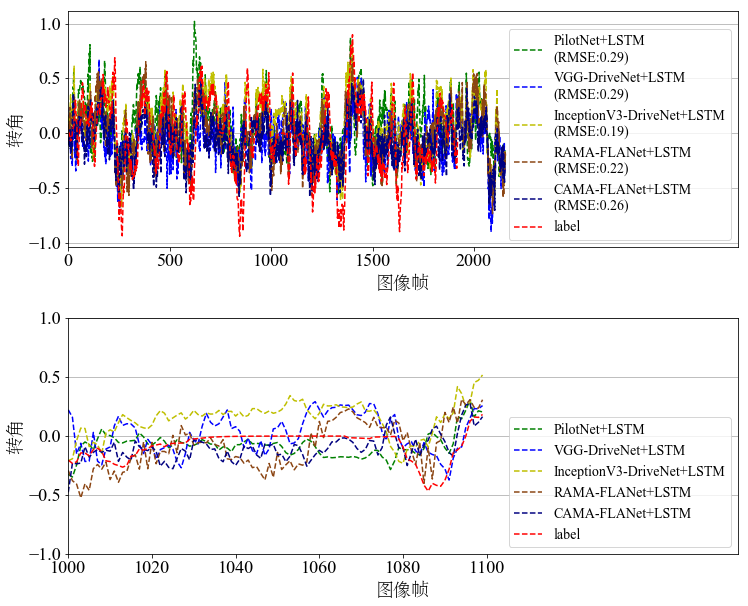

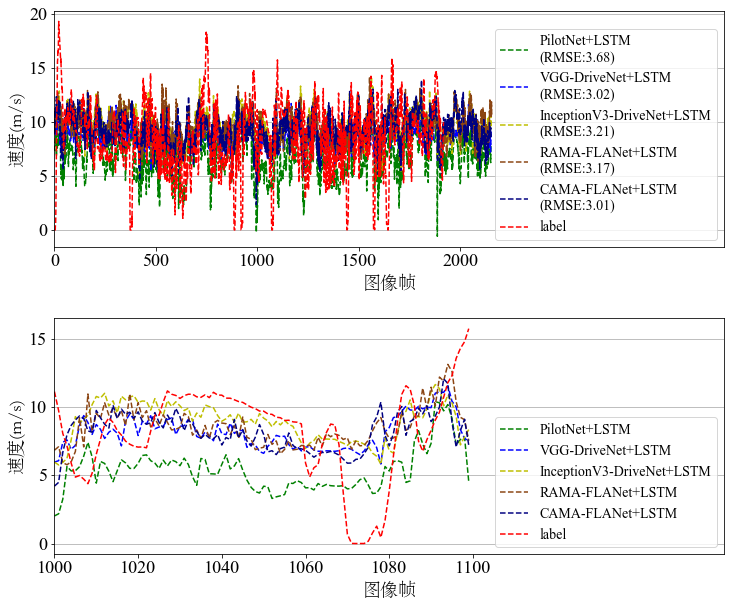

In [47]:
# plt.rc('font',family='Times New Roman') 
# plt.rc('font',size=18) 

font1 = {'family' : 'Times New Roman',
'weight' : 'black',
'size'   : 14}
font2 = {'family' : 'STSong',
'weight' : 'light',
'size'   : 18}
if_angle_filter = True
if_label_random = False
label_dir = "action_pose.txt"
predict_dir0 = "no_picture_esti/prediction_ud_vgg_transfer_5_19.log"
predict_dir1 = "no_picture_esti/prediction_ud_inception_transfer_5_19.log"
predict_dir2 = "no_picture_esti/prediction_ud_5_19.log"
predict_dir3 = "no_picture_esti/prediction_ud_nvnet_5_19.log"
predict_dir4 = "no_picture_esti/prediction_udacity_seg_fla_pw_lstm_conv_no_model_5_30.log"
predict_dir_temp = "prediction_comma_nvNet_5_19.log"
def angle_filter(angle,filter_size = 11):
    filter = np.ones((1,filter_size),dtype=np.float)/filter_size
    for i in range(filter_size//2,angle.shape[0]-filter_size//2):
        mul = np.matmul(filter,angle[i-filter_size//2:i+filter_size//2+1,:])
        angle[i,:] = mul
    return np.squeeze(angle,axis=1)
def cal_RMSE(predict_np,label_np):
    label_np_cut = label_np[:predict_np.shape[0],:]
    RMSE_angle = math.sqrt(mean_squared_error(predict_np[:,0],label_np_cut[:,0]))
    RMSE_speed = math.sqrt(mean_squared_error(predict_np[:,1],label_np_cut[:,1]))
    return [RMSE_angle,RMSE_speed]
f_label = open(label_dir,'r')
f_label_lines = f_label.readlines()
label = np.zeros((len(f_label_lines),2))
for i,j in enumerate(f_label_lines):
    label[i][0] = float(j.split(",")[-2])
    label[i][1] = float(j.split(",")[-1])
f_label.close()
if if_angle_filter:
    label[:,0] = angle_filter(np.reshape(label[:,0],[-1,1]))
if if_label_random:
    label[:,0] = label[:,0]#+np.random.randn(len(label))/10
    label[0:-1:20,1] = label[0:-1:20,1]+np.random.randn(len(label)//20)/5
def get_predict_np(predict_dir):
    f_predict = open(predict_dir,'r')
    f_predict_lines = f_predict.readlines()
    angle_predict = []
    speed_predict = []
    train_data_index = []
    test_data_index = []
    count_train = 0
    count_test = 0
    for i in f_predict_lines:
        if i != "":
            angle_predict.append(float(i.split(",")[2]))
            speed_predict.append(float(i.split(",")[3]))
            if (i.split(",")[0]=='train'):
                train_data_index.append(int(i.split(",")[1][:-4]))
                count_train +=1
            else:
                test_data_index.append(int(i.split(",")[1][:-4]))
                count_test +=1
    predict_np = np.array([angle_predict,speed_predict]).T
    return [predict_np,count_train,count_test,test_data_index,angle_predict,speed_predict]
def get_predict_np_lstm_conv(predict_dir):
    f_predict = open(predict_dir,'r')
    f_predict_lines = f_predict.readlines()
    angle_predict = []
    speed_predict = []
    for i in f_predict_lines:
        if i != "":
            angle_predict.append(float(i.split(",")[0]))
            speed_predict.append(float(i.split(",")[1]))
    predict_np = np.array([angle_predict,speed_predict]).T
    return predict_np
predict_np0 = get_predict_np_lstm_conv(predict_dir0)
predict_np1 = get_predict_np_lstm_conv(predict_dir1)
predict_np2 = get_predict_np_lstm_conv(predict_dir2)
predict_np3= get_predict_np_lstm_conv(predict_dir3)
predict_np4,count_train4,count_test4,test_data_index4,angle_predict4,speed_predict4 = get_predict_np(predict_dir_temp)
predict_np4= get_predict_np_lstm_conv(predict_dir4)

# RMSE_angle_train,RMSE_speed_train = cal_RMSE(predict_np[:count_train],label[train_data_index])
# RMSE_angle_test0,RMSE_speed_test0 = cal_RMSE(predict_np0[count_train0:],label[test_data_index0])
# RMSE_angle_test1,RMSE_speed_test1 = cal_RMSE(predict_np1[count_train1:],label[test_data_index1])
# RMSE_angle_test2,RMSE_speed_test2 = cal_RMSE(predict_np2[count_train1:],label[test_data_index2])
# RMSE_angle_test3,RMSE_speed_test3 = cal_RMSE(predict_np3[count_train3:],label[test_data_index3])
# RMSE_angle_test4,RMSE_speed_test4 = cal_RMSE(predict_np4[count_train4:],label[test_data_index4])
# # print("Train angle RMSE:%s,Train speed RMSE:%s\n \
# #     Test angle RMSE:%s,Test speed RMSE:%s"%(\
# #         RMSE_angle_train,RMSE_speed_train,RMSE_angle_test,RMSE_speed_test))
# #********  angle *********
# #********  angle *********
plt.figure(figsize=(12,10))
plt.subplots_adjust(wspace =0.2, hspace =0.3)
plt.subplot(211)
plt.xlabel("图像帧",font2)
plt.ylabel("转角",font2)#Speed(m/s)
plt.grid(axis="y")
plt.xlim([0,3300])
plt.xticks(range(0,2101,500))

plt.plot(range(len(predict_np3)),predict_np3[:,0],label = "PilotNet+LSTM\n(RMSE:0.29)", color='g', linestyle='--')
plt.plot(range(len(predict_np0)),predict_np0[:,0],label = "VGG-DriveNet+LSTM\n(RMSE:0.29)", color='b', linestyle='--')
plt.plot(range(len(predict_np1)),predict_np1[:,0],label = "InceptionV3-DriveNet+LSTM\n(RMSE:0.19)", color='y', linestyle='--')
plt.plot(range(len(predict_np4)),predict_np4[:,0],label = "RAMA-FLANet+LSTM\n(RMSE:0.22)", color='saddlebrown', linestyle='--')
plt.plot(range(len(predict_np2)),predict_np2[:,0],label = "CAMA-FLANet+LSTM\n(RMSE:0.26)", color='navy', linestyle='--')
plt.plot(range(len(test_data_index4)),label[test_data_index4,0],label = "label", color='r', linestyle='--')
plt.legend(loc=4,prop=font1)

plt.subplot(212)
plt.grid(axis="y")
plt.xlabel("图像帧",font2)
plt.ylabel("转角",font2)#Speed(m/s)
plt.xlim([1000,1160])
plt.xticks(range(1000,1101,20))
plt.ylim((-1,1))
list_min = 1000
list_max = 1100

plt.plot(range(list_min,list_max),predict_np3[:,0][list_min:list_max],label = "PilotNet+LSTM", color='g', linestyle='--')
plt.plot(range(list_min,list_max),predict_np0[:,0][list_min:list_max],label = "VGG-DriveNet+LSTM", color='b', linestyle='--')
plt.plot(range(list_min,list_max),predict_np1[:,0][list_min:list_max],label = "InceptionV3-DriveNet+LSTM", color='y', linestyle='--')
plt.plot(range(list_min,list_max),predict_np4[:,0][list_min:list_max],label = "RAMA-FLANet+LSTM", color='saddlebrown', linestyle='--')
plt.plot(range(list_min,list_max),predict_np2[:,0][list_min:list_max],label = "CAMA-FLANet+LSTM", color='navy', linestyle='--')
plt.plot(range(list_min,list_max),label[test_data_index4,0][list_min:list_max],label = "label", color='r', linestyle='--')
plt.legend(loc=4,prop=font1)
plt.savefig("ud_a.png",dpi=500,bbox_inches = 'tight')
# #********  speed *********
# #********  speed *********
plt.figure(figsize=(12,10))
plt.subplots_adjust(wspace =0.2, hspace =0.3)
plt.subplot(211)
plt.xlabel("图像帧",font2)
plt.ylabel("速度(m/s)",font2)#Speed(m/s)
plt.grid(axis="y")
plt.xlim([0,3300])
plt.xticks(range(0,2001,500))

plt.plot(range(len(predict_np3)),predict_np3[:,1],label = "PilotNet+LSTM\n(RMSE:3.68)", color='g', linestyle='--')
plt.plot(range(len(predict_np0)),predict_np0[:,1],label = "VGG-DriveNet+LSTM\n(RMSE:3.02)", color='b', linestyle='--')
plt.plot(range(len(predict_np1)),predict_np1[:,1],label = "InceptionV3-DriveNet+LSTM\n(RMSE:3.21)", color='y', linestyle='--')
plt.plot(range(len(predict_np4)),predict_np4[:,1],label = "RAMA-FLANet+LSTM\n(RMSE:3.17)", color='saddlebrown', linestyle='--')
plt.plot(range(len(predict_np2)),predict_np2[:,1],label = "CAMA-FLANet+LSTM\n(RMSE:3.01)", color='navy', linestyle='--')
plt.plot(range(len(test_data_index4)),label[test_data_index4,1],label = "label", color='r', linestyle='--')
plt.legend(loc=4,prop=font1)

plt.subplot(212)
plt.grid(axis="y")
plt.xlabel("图像帧",font2)
plt.ylabel("速度(m/s)",font2)#Speed(m/s)
plt.xlim([1000,1160])
plt.xticks(range(1000,1101,20))
# plt.ylim([20,40])
list_min = 1000
list_max = 1100

plt.plot(range(list_min,list_max),predict_np3[:,1][list_min:list_max],label = "PilotNet+LSTM", color='g', linestyle='--')
plt.plot(range(list_min,list_max),predict_np0[:,1][list_min:list_max],label = "VGG-DriveNet+LSTM", color='b', linestyle='--')
plt.plot(range(list_min,list_max),predict_np1[:,1][list_min:list_max],label = "InceptionV3-DriveNet+LSTM", color='y', linestyle='--')
plt.plot(range(list_min,list_max),predict_np4[:,1][list_min:list_max],label = "RAMA-FLANet+LSTM", color='saddlebrown', linestyle='--')
plt.plot(range(list_min,list_max),predict_np2[:,1][list_min:list_max],label = "CAMA-FLANet+LSTM", color='navy', linestyle='--')
plt.plot(range(list_min,list_max),label[test_data_index4,1][list_min:list_max],label = "label", color='r', linestyle='--')
plt.legend(loc=4,prop=font1)
plt.savefig("ud_s.png",dpi=500,bbox_inches = 'tight')
plt.show()

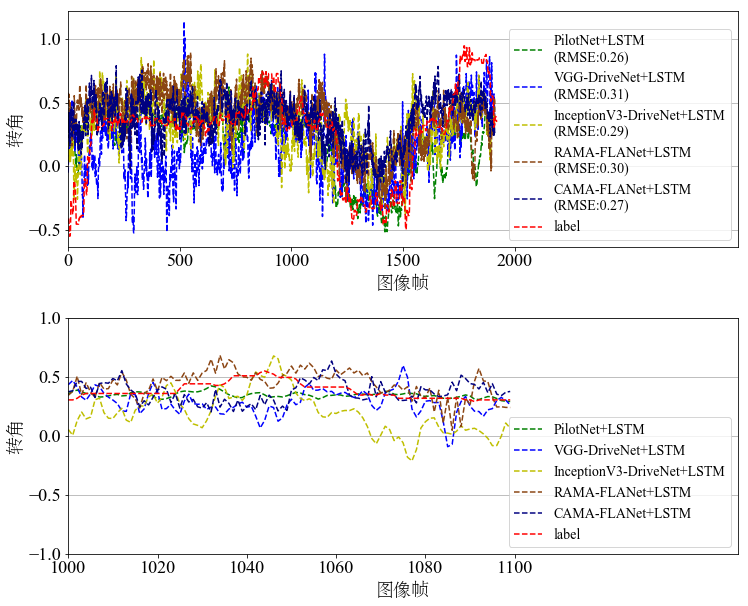

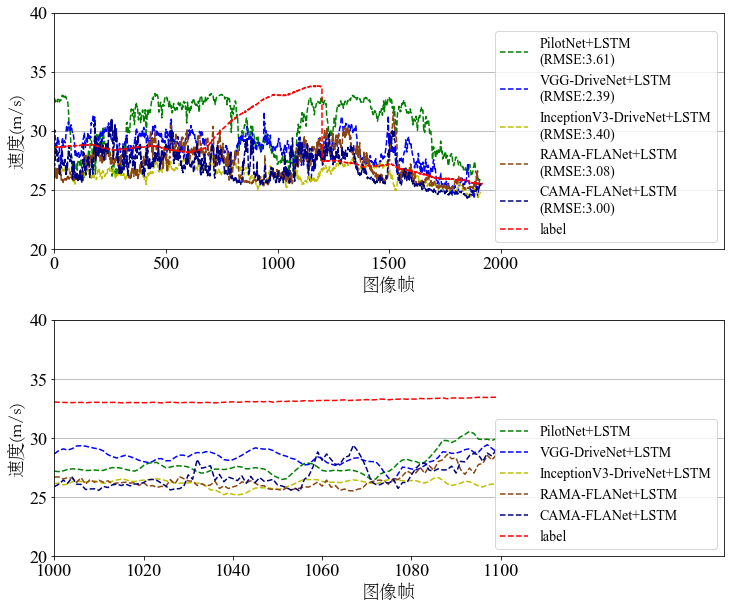

In [51]:
# plt.rc('font',family='Times New Roman') 
# plt.rc('font',size=18) 

font1 = {'family' : 'Times New Roman',
'weight' : 'black',
'size'   : 14}
font2 = {'family' : 'STSong',
'weight' : 'light',
'size'   : 18}
if_angle_filter = False
if_label_random = False
label_dir = "comma_label_ds.txt"
predict_dir0 = "no_picture_esti/prediction_comma_vgg_transfer_5_19.log"
predict_dir1 = "no_picture_esti/prediction_comma_inception_5_19.log"
predict_dir2 = "no_picture_esti/prediction_comma_vgg_fla_pw_lstm_conv_no_model_5_30.log"
predict_dir3 = "no_picture_esti/prediction_comma_nvnet_5_19.log"
predict_dir4 = "no_picture_esti/prediction_comma_seg_fla_pw_lstm_conv_no_model_5_30.log"
predict_dir_temp = "prediction_comma_nvNet_5_19.log"
def angle_filter(angle,filter_size = 11):
    filter = np.ones((1,filter_size),dtype=np.float)/filter_size
    for i in range(filter_size//2,angle.shape[0]-filter_size//2):
        mul = np.matmul(filter,angle[i-filter_size//2:i+filter_size//2+1,:])
        angle[i,:] = mul
    return np.squeeze(angle,axis=1)
def cal_RMSE(predict_np,label_np):
    label_np_cut = label_np[:predict_np.shape[0],:]
    RMSE_angle = math.sqrt(mean_squared_error(predict_np[:,0],label_np_cut[:,0]))
    RMSE_speed = math.sqrt(mean_squared_error(predict_np[:,1],label_np_cut[:,1]))
    return [RMSE_angle,RMSE_speed]
f_label = open(label_dir,'r')
f_label_lines = f_label.readlines()
label = np.zeros((len(f_label_lines),2))
for i,j in enumerate(f_label_lines):
    label[i][0] = float(j.split(",")[-2])
    label[i][1] = float(j.split(",")[-1])
f_label.close()
if if_angle_filter:
    label[:,0] = angle_filter(np.reshape(label[:,0],[-1,1]))
if if_label_random:
    label[:,0] = label[:,0]#+np.random.randn(len(label))/10
    label[0:-1:20,1] = label[0:-1:20,1]+np.random.randn(len(label)//20)/5
def get_predict_np(predict_dir):
    f_predict = open(predict_dir,'r')
    f_predict_lines = f_predict.readlines()
    angle_predict = []
    speed_predict = []
    train_data_index = []
    test_data_index = []
    count_train = 0
    count_test = 0
    for i in f_predict_lines:
        if i != "":
            angle_predict.append(float(i.split(",")[2]))
            speed_predict.append(float(i.split(",")[3]))
            if (i.split(",")[0]=='train'):
                train_data_index.append(int(i.split(",")[1][:-4]))
                count_train +=1
            else:
                test_data_index.append(int(i.split(",")[1][:-4]))
                count_test +=1
    predict_np = np.array([angle_predict,speed_predict]).T
    return [predict_np,count_train,count_test,test_data_index,angle_predict,speed_predict]
def get_predict_np_lstm_conv(predict_dir):
    f_predict = open(predict_dir,'r')
    f_predict_lines = f_predict.readlines()
    angle_predict = []
    speed_predict = []
    for i in f_predict_lines:
        if i != "":
            angle_predict.append(float(i.split(",")[0]))
            speed_predict.append(float(i.split(",")[1]))
    predict_np = np.array([angle_predict,speed_predict]).T
    return predict_np
predict_np0 = get_predict_np_lstm_conv(predict_dir0)
predict_np1 = get_predict_np_lstm_conv(predict_dir1)
predict_np2 = get_predict_np_lstm_conv(predict_dir2)
predict_np3= get_predict_np_lstm_conv(predict_dir3)
predict_np4,count_train4,count_test4,test_data_index4,angle_predict4,speed_predict4 = get_predict_np(predict_dir_temp)
predict_np4= get_predict_np_lstm_conv(predict_dir4)

# RMSE_angle_train,RMSE_speed_train = cal_RMSE(predict_np[:count_train],label[train_data_index])
# RMSE_angle_test0,RMSE_speed_test0 = cal_RMSE(predict_np0[count_train0:],label[test_data_index0])
# RMSE_angle_test1,RMSE_speed_test1 = cal_RMSE(predict_np1[count_train1:],label[test_data_index1])
# RMSE_angle_test2,RMSE_speed_test2 = cal_RMSE(predict_np2[count_train1:],label[test_data_index2])
# RMSE_angle_test3,RMSE_speed_test3 = cal_RMSE(predict_np3[count_train3:],label[test_data_index3])
# RMSE_angle_test4,RMSE_speed_test4 = cal_RMSE(predict_np4[count_train4:],label[test_data_index4])
# # print("Train angle RMSE:%s,Train speed RMSE:%s\n \
# #     Test angle RMSE:%s,Test speed RMSE:%s"%(\
# #         RMSE_angle_train,RMSE_speed_train,RMSE_angle_test,RMSE_speed_test))
# #********  angle *********
# #********  angle *********
plt.figure(figsize=(12,10))
plt.subplots_adjust(wspace =0.2, hspace =0.3)
plt.subplot(211)
plt.xlabel("图像帧",font2)
plt.ylabel("转角",font2)#Speed(m/s)
plt.grid(axis="y")
plt.xlim([0,3000])
plt.xticks(range(0,2001,500))

plt.plot(range(len(predict_np3)),predict_np3[:,0],label = "PilotNet+LSTM\n(RMSE:0.26)", color='g', linestyle='--')
plt.plot(range(len(predict_np0)),predict_np0[:,0],label = "VGG-DriveNet+LSTM\n(RMSE:0.31)", color='b', linestyle='--')
plt.plot(range(len(predict_np1)),predict_np1[:,0],label = "InceptionV3-DriveNet+LSTM\n(RMSE:0.29)", color='y', linestyle='--')
plt.plot(range(len(predict_np4)),predict_np4[:,0],label = "RAMA-FLANet+LSTM\n(RMSE:0.30)", color='saddlebrown', linestyle='--')
plt.plot(range(len(predict_np2)),predict_np2[:,0],label = "CAMA-FLANet+LSTM\n(RMSE:0.27)", color='navy', linestyle='--')
plt.plot(range(len(test_data_index4)),label[test_data_index4,0],label = "label", color='r', linestyle='--')
plt.legend(loc=4,prop=font1)

plt.subplot(212)
plt.grid(axis="y")
plt.xlabel("图像帧",font2)
plt.ylabel("转角",font2)#Speed(m/s)
plt.xlim([1000,1150])
plt.xticks(range(1000,1101,20))
plt.ylim((-1,1))
list_min = 1000
list_max = 1100

plt.plot(range(list_min,list_max),predict_np3[:,0][list_min:list_max],label = "PilotNet+LSTM", color='g', linestyle='--')
plt.plot(range(list_min,list_max),predict_np0[:,0][list_min:list_max],label = "VGG-DriveNet+LSTM", color='b', linestyle='--')
plt.plot(range(list_min,list_max),predict_np1[:,0][list_min:list_max],label = "InceptionV3-DriveNet+LSTM", color='y', linestyle='--')
plt.plot(range(list_min,list_max),predict_np4[:,0][list_min:list_max],label = "RAMA-FLANet+LSTM", color='saddlebrown', linestyle='--')
plt.plot(range(list_min,list_max),predict_np2[:,0][list_min:list_max],label = "CAMA-FLANet+LSTM", color='navy', linestyle='--')
plt.plot(range(list_min,list_max),label[test_data_index4,0][list_min:list_max],label = "label", color='r', linestyle='--')
plt.legend(loc=4,prop=font1)
plt.savefig("co_a.png",dpi=500,bbox_inches = 'tight')
# #********  speed *********
# #********  speed *********
plt.figure(figsize=(12,10))
plt.subplots_adjust(wspace =0.2, hspace =0.3)
plt.subplot(211)
plt.xlabel("图像帧",font2)
plt.ylabel("速度(m/s)",font2)#Speed(m/s)
plt.grid(axis="y")
plt.xlim([0,3000])
plt.ylim([20,40])
plt.xticks(range(0,2001,500))

plt.plot(range(len(predict_np3)),predict_np3[:,1],label = "PilotNet+LSTM\n(RMSE:3.61)", color='g', linestyle='--')
plt.plot(range(len(predict_np0)),predict_np0[:,1],label = "VGG-DriveNet+LSTM\n(RMSE:2.39)", color='b', linestyle='--')
plt.plot(range(len(predict_np1)),predict_np1[:,1],label = "InceptionV3-DriveNet+LSTM\n(RMSE:3.40)", color='y', linestyle='--')
plt.plot(range(len(predict_np4)),predict_np4[:,1],label = "RAMA-FLANet+LSTM\n(RMSE:3.08)", color='saddlebrown', linestyle='--')
plt.plot(range(len(predict_np2)),predict_np2[:,1],label = "CAMA-FLANet+LSTM\n(RMSE:3.00)", color='navy', linestyle='--')
plt.plot(range(len(test_data_index4)),label[test_data_index4,1],label = "label", color='r', linestyle='--')
plt.legend(loc=4,prop=font1)

plt.subplot(212)
plt.grid(axis="y")
plt.xlabel("图像帧",font2)
plt.ylabel("速度(m/s)",font2)#Speed(m/s)
plt.xlim([1000,1150])
plt.xticks(range(1000,1101,20))
plt.ylim([20,40])
list_min = 1000
list_max = 1100

plt.plot(range(list_min,list_max),predict_np3[:,1][list_min:list_max],label = "PilotNet+LSTM", color='g', linestyle='--')
plt.plot(range(list_min,list_max),predict_np0[:,1][list_min:list_max],label = "VGG-DriveNet+LSTM", color='b', linestyle='--')
plt.plot(range(list_min,list_max),predict_np1[:,1][list_min:list_max],label = "InceptionV3-DriveNet+LSTM", color='y', linestyle='--')
plt.plot(range(list_min,list_max),predict_np4[:,1][list_min:list_max],label = "RAMA-FLANet+LSTM", color='saddlebrown', linestyle='--')
plt.plot(range(list_min,list_max),predict_np2[:,1][list_min:list_max],label = "CAMA-FLANet+LSTM", color='navy', linestyle='--')
plt.plot(range(list_min,list_max),label[test_data_index4,1][list_min:list_max],label = "label", color='r', linestyle='--')
plt.legend(loc=4,prop=font1)
plt.savefig("co_s.png",dpi=500,bbox_inches = 'tight')
plt.show()


### Calar绘图

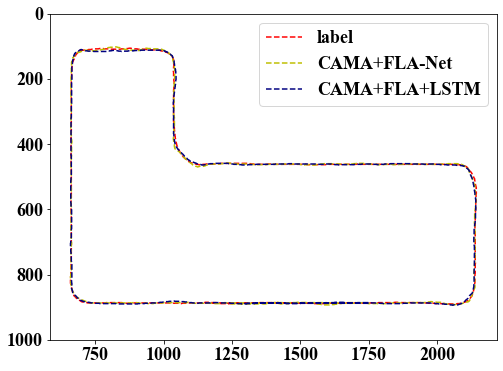

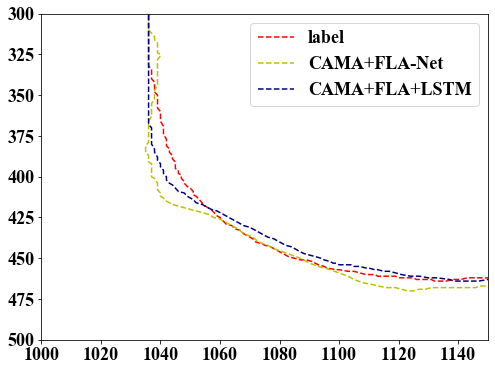

In [26]:
from matplotlib import pyplot as plt
plt.rc('font',family='Times New Roman') 
plt.rc('font',size=18) 

f1 = open("save_data_first.txt","r").readlines()
f2 = open("save_data_second.txt","r").readlines()
f3 = open("save_data_third.txt","r").readlines()
first_x = [float(i.split()[6].split(",")[0][1:]) for i in f1]
first_y = [float(i.split()[6].split(",")[1][:-1]) for i in f1]
second_x = [float(i.split()[6].split(",")[0][1:]) for i in f2]
second_y = [float(i.split()[6].split(",")[1][:-1]) for i in f2]
third_x = [float(i.split()[6].split(",")[0][1:]) for i in f3]
third_y = [float(i.split()[6].split(",")[1][:-1]) for i in f3]
plt.figure(figsize=(8,6))
plt.ylim([1000,0])
plt.plot(first_x,first_y,"--",c="r",label="label")
plt.plot(third_x,third_y,"--",c="y",label="CAMA+FLA-Net")
plt.plot(second_x,second_y,"--",c="navy",label="CAMA+FLA+LSTM")
plt.legend()
plt.savefig('test1.png',dpi=500,bbox_inches = 'tight')
plt.figure(figsize=(8,6))
plt.ylim([500,300])
plt.xlim([1000,1150])
plt.plot(first_x,first_y,"--",c="r",label="label")
plt.plot(third_x,third_y,"--",c="y",label="CAMA+FLA-Net")
plt.plot(second_x,second_y,"--",c="navy",label="CAMA+FLA+LSTM")
plt.legend()
plt.savefig('test2.png',dpi=500,bbox_inches = 'tight')
plt.show()


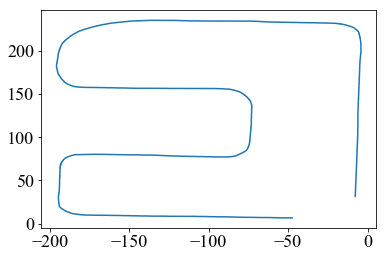

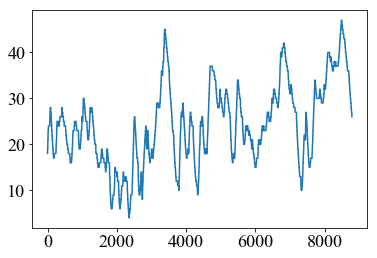

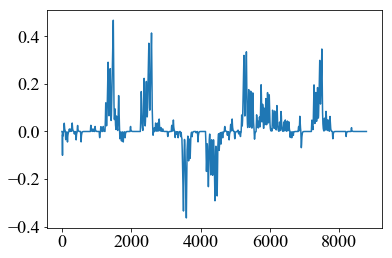

In [9]:
from matplotlib import pyplot as plt
plt.rc('font',family='Times New Roman') 
plt.rc('font',size=18) 

f = open(r"D:\dataset\carla527_train2\save_data.txt","r").readlines()
locx=[]
locy=[]
for i in f:
    s1 = i.split(",")
    for id,j in enumerate(s1):
        if j[:8] =="Location":
            x = j.split("(")[-1]
            y = s1[id+1][:-1]
            locx.append(float(x))
            locy.append(float(y))
plt.plot(locy,locx)
# plt.ylim([250,-50])
# plt.xlim([200,0])
speed=[]
for i in f:
    s1 = i.split(",")
    for id,j in enumerate(s1):
        if j[:5] =="Speed":
            s = j.split(":")[-1][:-4]
            speed.append(float(s))
plt.figure()
plt.plot(range(len(speed)),speed)

steer=[]
for i in f:
    s1 = i.split(",")
    for id,j in enumerate(s1):
        if j[:5] =="steer":
            s = j.split(":")[-1][:-1]
            steer.append(float(s))
            
def angle_filter(angle,filter_size = 29):
    filter = np.ones((1,filter_size),dtype=np.float)/filter_size
    for i in range(filter_size//2,angle.shape[0]-filter_size//2):
        mul = np.matmul(filter,angle[i-filter_size//2:i+filter_size//2+1,:])
        angle[i,:] = mul
    return np.squeeze(angle,axis=1)
steer_np = np.array(steer)
steer_np = angle_filter(np.reshape(steer_np,[-1,1]))
plt.figure()
plt.plot(range(len(steer_np)),steer_np)
plt.show()


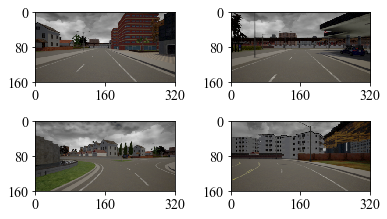

In [5]:
from matplotlib import pyplot as plt 
from PIL import Image
import seaborn as sns 
plt.rc('font',family='Times New Roman') 
plt.rc('font',size=14) 
img_dir = "D:/dataset/carla527_train1_uisee/img/"
img_name = ["3.jpg","682.jpg","3178.jpg","5604.jpg"]
imgs = [cv2.resize(np.array(Image.open(img_dir+i)),(320,160)) for i in img_name]
plt.subplots_adjust(wspace =0.4, hspace =0)
plt.subplot(221)
plt.xlim([0,320])
plt.xticks(range(0,321,160))
plt.ylim([160,0])
plt.yticks(range(0,161,80))
plt.imshow(imgs[0])
plt.subplot(222)
plt.xlim([0,320])
plt.xticks(range(0,321,160))
plt.ylim([160,0])
plt.yticks(range(0,161,80))
plt.imshow(imgs[1])
plt.subplot(223)
plt.xlim([0,320])
plt.xticks(range(0,321,160))
plt.ylim([160,0])
plt.yticks(range(0,161,80))
plt.imshow(imgs[2])
plt.subplot(224)
plt.xlim([0,320])
plt.xticks(range(0,321,160))
plt.ylim([160,0])
plt.yticks(range(0,161,80))
plt.imshow(imgs[3])
plt.savefig("calar_original.jpg",dpi=500,bbox_inches = 'tight')
plt.show()

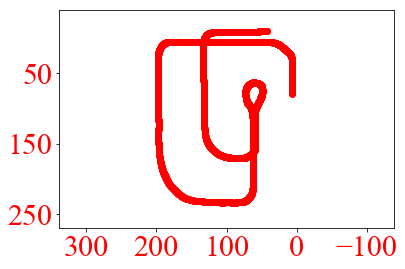

In [92]:
from matplotlib import pyplot as plt
# plt.rc('font',family='Times New Roman') 
plt.rc('font',size=30) 
plt.rc('font',weight="bold") 
# font1 = {'family' : 'Times New Roman',
# 'weight' : 'black',
# 'size'   : 14}
# font2 = {'family' : 'STSong',
# 'weight' : 'light',
# 'size'   : 18,
# 'color':'r'}
f = open(r"D:\dataset\carla527_test1_uisee1_3\action_pose_carla.txt","r").readlines()
locx=[]
locy=[]
for i in f:
    s1 = i.split(",")
    x = s1[1][1:]
    y = s1[2][:-1]
    locx.append(float(x))
    locy.append(float(y))
plt.axis('equal')
for i in plt.gca().get_xticklabels():
    i.set_color("r")
for i in plt.gca().get_yticklabels():
    i.set_color("r")
plt.ylim([270,-40])
plt.yticks(range(250,-20,-100))
plt.xlim([200,0])
plt.xticks(range(300,-101,-100))
plt.scatter(locy,locx,c='r')

plt.savefig('carla_loc.png',transparent = True,dpi=500,bbox_inches = 'tight')
plt.show()

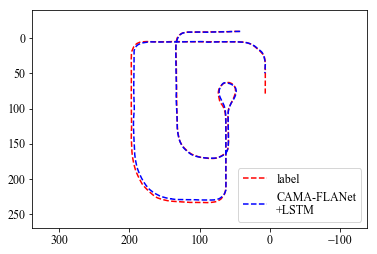

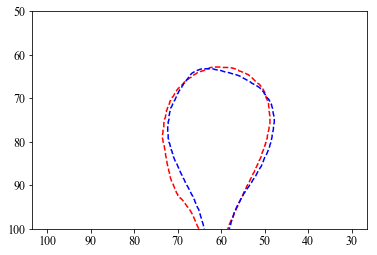

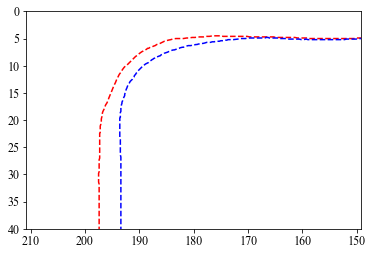

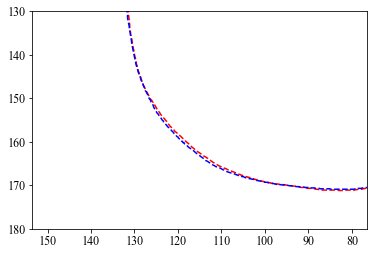

In [96]:
from matplotlib import pyplot as plt
# plt.rc('font',family='Times New Roman') 
plt.rc('font',size=12) 
plt.rc('font',weight="bold") 
# font1 = {'family' : 'Times New Roman',
# 'weight' : 'black',
# 'size'   : 14}
# font2 = {'family' : 'STSong',
# 'weight' : 'light',
# 'size'   : 18,
# 'color':'r'}
f = open(r"D:\dataset\carla527_test1_uisee1_3\action_pose_carla.txt","r").readlines()
f2 = open(r"D:\dataset\carla527_test2_uisee1_3\action_pose_carla.txt","r").readlines()
locx=[]
locy=[]
locx2=[]
locy2=[]
for i in f:
    s1 = i.split(",")
    x = s1[1][1:]
    y = s1[2][:-1]
    locx.append(float(x))
    locy.append(float(y))
for i in f2:
    s1 = i.split(",")
    x = s1[1][1:]
    y = s1[2][:-1]
    locx2.append(float(x))
    locy2.append(float(y))
plt.axis('equal')
plt.ylim([270,-40])
# plt.yticks(range(250,-20,-100))
plt.xlim([200,0])
# plt.xticks(range(300,-101,-100))
plt.plot(locy,locx,'--',c='r',label="label")
plt.plot(locy2,locx2,'--',c='b',label="CAMA-FLANet\n+LSTM")
plt.legend(loc=4)
plt.savefig('carla_loc1.png',transparent = True,dpi=500,bbox_inches = 'tight')
plt.figure()
plt.axis('equal')
plt.ylim([100,50])
# plt.yticks(range(250,-20,-100))
plt.xlim([80,50])
# plt.xticks(range(300,-101,-100))
plt.plot(locy,locx,'--',c='r')
plt.plot(locy2,locx2,'--',c='b')

plt.savefig('carla_loc2.png',transparent = True,dpi=500,bbox_inches = 'tight')

plt.figure()
plt.axis('equal')
plt.ylim([40,0])
# plt.yticks(range(250,-20,-100))
plt.xlim([200,160])
# plt.xticks(range(300,-101,-100))
plt.plot(locy,locx,'--',c='r')
plt.plot(locy2,locx2,'--',c='b')
plt.savefig('carla_loc3.png',transparent = True,dpi=500,bbox_inches = 'tight')

plt.figure()
plt.axis('equal')
plt.ylim([180,130])
# plt.yticks(range(250,-20,-100))
plt.xlim([140,90])
# plt.xticks(range(300,-101,-100))
plt.plot(locy,locx,'--',c='r')
plt.plot(locy2,locx2,'--',c='b')
plt.savefig('carla_loc4.png',transparent = True,dpi=500,bbox_inches = 'tight')
# plt.savefig('carla_loc.png',transparent = True,dpi=500,bbox_inches = 'tight')
plt.show()

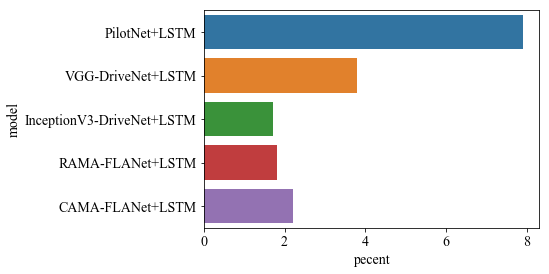

In [74]:
import seaborn as sns
import pandas as pd
plt.rc('font',family='Times New Roman') 
plt.rc('font',size=14) 

font1 = {'family' : 'Times New Roman',
'weight' : 'black',
'size'   : 10}
font2 = {'family' : 'STSong',
'weight' : 'light',
'size'   : 14}
# plt.figure(0)
# plt.ylabel("速度(m/s)",font2)#Speed(m/s)
# [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]
# a = [{"vgg":9.5,"vg":21.7,"gg":17.3,"vgg":13.0}]

# data = {'pecent':[9.5,21.7,17.3,13.0],
#          'model':["VGG-DriveNet","InceptionV3-DriveNet","RAMA-FLANet","CAMA-FLANet"]}
# data = {'pecent':[9.6,3.0,5.0,11.3],
#          'model':["VGG-DriveNet","InceptionV3-DriveNet","RAMA-FLANet","CAMA-FLANet"]}
# data = {'pecent':[1.3,1.1,3.6,3.2,3.3],
#          'model':["PilotNet+LSTM","VGG-DriveNet+LSTM","InceptionV3-DriveNet+LSTM","RAMA-FLANet+LSTM","CAMA-FLANet+LSTM"]}
data = {'pecent':[7.9,3.8,1.7,1.8,2.2],
         'model':["PilotNet+LSTM","VGG-DriveNet+LSTM","InceptionV3-DriveNet+LSTM","RAMA-FLANet+LSTM","CAMA-FLANet+LSTM"]}
df = pd.DataFrame(data)


sns.barplot(x="pecent",y="model",data= df,orient="h")
plt.savefig('zhuzhuan.png',dpi=500,bbox_inches = 'tight')
plt.show()
